# Elon Musks' tweets & Crypto prices correlation

### Project Report

Demetris Englezos

# 1. Introduction - Interesting Questions

#### In this introductory section interesting questions are asked as well as how they will tried to answer. Every day we are bombardized that Elon Musk posted this and that and that influence or had a big impact in the rise or fall of a cryptocurrency value and/or Tesla. Well in this notebook numbers will be set in the everyday quotes using data to analyze how big is the impact of his tweets. To check if he is indeed a "puppet master" of the techno-economical world and if he actualy (and how much) manipulate these prices. 

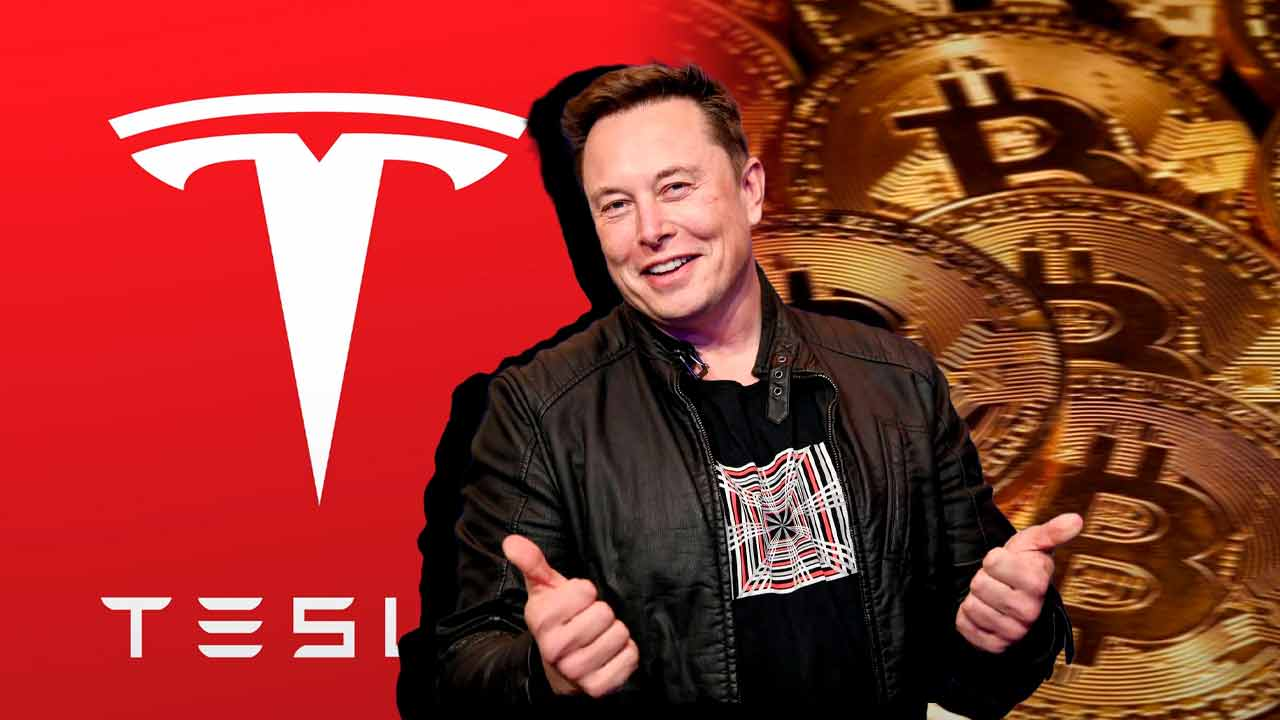

In [2]:
from IPython.display import Image
Image('elon_tesla.jpeg')

# 2. Methodology

#### To investigate what was already discribed in the introduction, we get data from kaggle with all of his tweets and all the prices of Tesla stock, Bitcoin and Dogecoin (open, close, high and low). In the beginning we checked the trend of Elon tweets. For example how often does he tweets, what are topics he is posting about and provide a sentiment analysis of his tweets. Then we have some time analysis of the cryptocurrencies's and Tesla's prices. In the end we check how much the prices change when he tweets about related topics compared to normal rises or falls of the price. Changes in the prices are distinquished if the sentiment of the tweet are positive or negative. 

# 3. Data Analysis

In [3]:
#importing our libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import datetime as dt
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
#importing the related datasets.
df=pd.read_csv('TweetsElon.csv')
dfd=pd.read_csv('DOGE-USD.csv')
dft=pd.read_csv('TSLA.csv')
dfb=pd.read_csv('BTC-USD.csv')

### Important to mention is that for the tweets dataset, we have values until 11-04-2021 while for the crypto and tesla prices until later in October of 2021. For this project we stop until 11-04 to compare tweets and prices 

In [5]:
dft.head(3)

Date   Open   High    Low  Close  Adj Close    Volume
0  2010-06-29  3.800  5.000  3.508  4.778      4.778  93831500
1  2010-06-30  5.158  6.084  4.660  4.766      4.766  85935500
2  2010-07-01  5.000  5.184  4.054  4.392      4.392  41094000

In [6]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df.head(2)

id      conversation_id                created_at  \
0  1381273474400800773  1381002894032347138  2021-04-11 18:50:33 EEST   
1  1381273076709478403  1372444955050971142  2021-04-11 18:48:58 EEST   

         date      time  timezone   user_id  username       name  place  \
0  2021-04-11  18:50:33       300  44196397  elonmusk  Elon Musk    NaN   
1  2021-04-11  18:48:58       300  44196397  elonmusk  Elon Musk    NaN   

                                               tweet language mentions urls  \
0  @vincent13031925 For now. Costs are decreasing...       en       []   []   
1                           Love this beautiful shot       en       []   []   

  photos  replies_count  retweets_count  likes_count hashtags cashtags  \
0     []            640             444        15281       []       []   
1     []           2464            1517        71161       []       []   

                                                link  retweet quote_url  \
0  https://twitter.com/elonmusk/status/1381273474...    False       NaN   
1  https://twitter.com/elonmusk/status/1381273076...    False       NaN   

   video thumbnail  near  geo  source  user_rt_id  user_rt  retweet_id  \
0      0       NaN   NaN  NaN     NaN         NaN      NaN         NaN   
1      0       NaN   NaN  NaN     NaN         NaN      NaN         NaN   

                                            reply_to  retweet_date  translate  \
0  [{'screen_name': 'vincent13031925', 'name': 'V...           NaN        NaN   
1                                                 []           NaN        NaN   

   trans_src  trans_dest  
0        NaN         NaN  
1        NaN         NaN

In [7]:
df.columns

Index(['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone',
       'user_id', 'username', 'name', 'place', 'tweet', 'language', 'mentions',
       'urls', 'photos', 'replies_count', 'retweets_count', 'likes_count',
       'hashtags', 'cashtags', 'link', 'retweet', 'quote_url', 'video',
       'thumbnail', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest'],
      dtype='object')

In [8]:
df1=df[['date','time','tweet','likes_count','replies_count','retweets_count','photos','reply_to']]
df1['date']=df1['date'].astype('datetime64')
df1.set_index('date',inplace=True)
df1['year']=df1.index.year

<ipython-input-8-a617de34a3a6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['date']=df1['date'].astype('datetime64')
<ipython-input-8-a617de34a3a6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['year']=df1.index.year


In [9]:
(df1['reply_to']=='[]').value_counts()

False    8145
True     4417
Name: reply_to, dtype: int64

In [10]:
df1.iloc[29,5]

"['https://pbs.twimg.com/media/EykLyAtU4AEGjqp.jpg']"

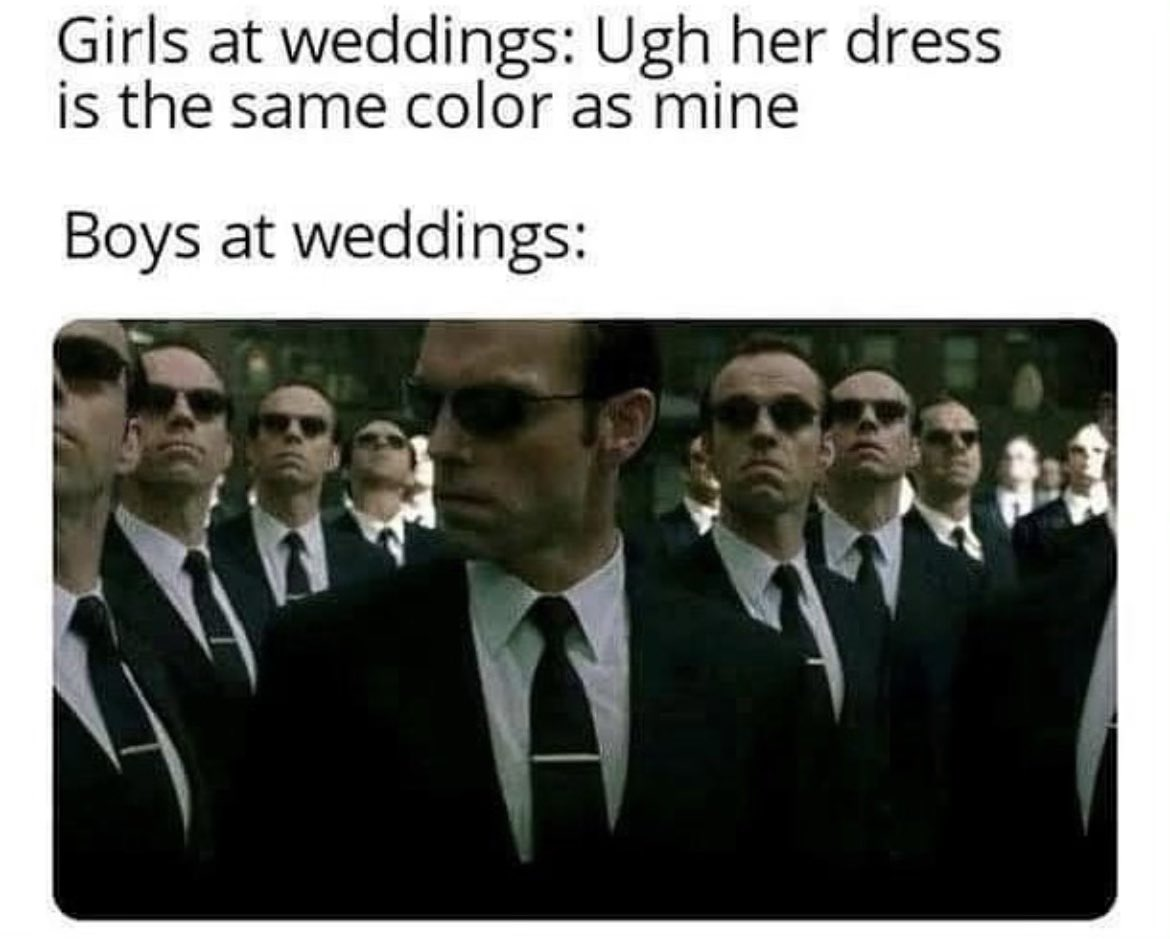

In [11]:
Image("https://pbs.twimg.com/media/EykLyAtU4AEGjqp.jpg",width=500,height=500)

In [12]:
df1['year'].unique()

array([2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011,
       2010], dtype=int64)

In [13]:
df1.head()

time                                              tweet  \
date                                                                      
2021-04-11  18:50:33  @vincent13031925 For now. Costs are decreasing...   
2021-04-11  18:48:58                           Love this beautiful shot   
2021-04-11  17:49:38  @agnostoxxx @CathieDWood @ARKInvest Trust the ...   
2021-04-11  15:23:49                 The art In Cyberpunk is incredible   
2021-04-11  09:18:47                                    @itsALLrisky 🤣🤣   

            likes_count  replies_count  retweets_count photos  \
date                                                            
2021-04-11        15281            640             444     []   
2021-04-11        71161           2464            1517     []   
2021-04-11         1380            115              48     []   
2021-04-11       228144           8437           10329     []   
2021-04-11         7489            446             542     []   

                                                     reply_to  year  
date                                                                 
2021-04-11  [{'screen_name': 'vincent13031925', 'name': 'V...  2021  
2021-04-11                                                 []  2021  
2021-04-11  [{'screen_name': 'agnostoxxx', 'name': 'Shrubb...  2021  
2021-04-11                                                 []  2021  
2021-04-11  [{'screen_name': 'itsALLrisky', 'name': '💸💸💸',...  2021

Text(0.5, 0, 'Year')

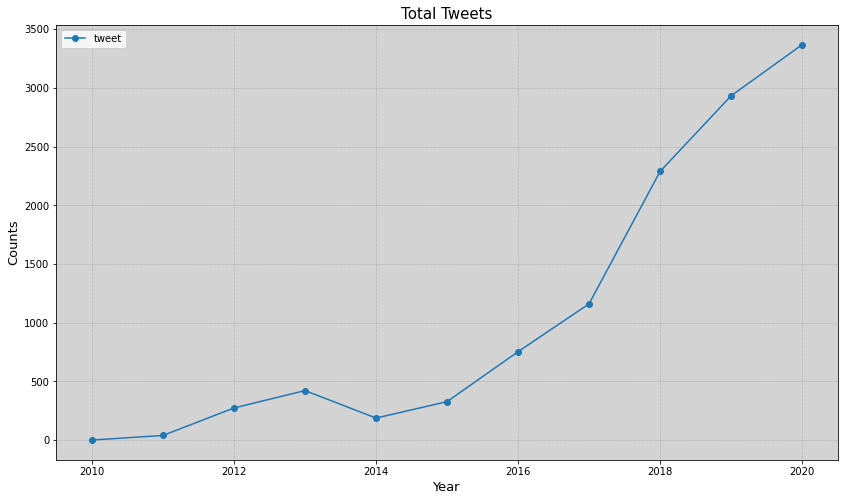

In [14]:
ax=df1[['year','tweet']].groupby(by=['year']).count().head(11).plot(kind='line',style='o-',figsize=(14,8))
ax.grid(color='grey', linestyle='dotted', linewidth=0.5)
ax.set_title('Total Tweets',size=15)
ax.set_facecolor('lightgrey')
ax.set_ylabel('Counts',size=13)
ax.set_xlabel('Year',size=13)

### With the above graph we see that Elon Musk tweets are increasing per year.

Text(0.5, 0, 'Year')

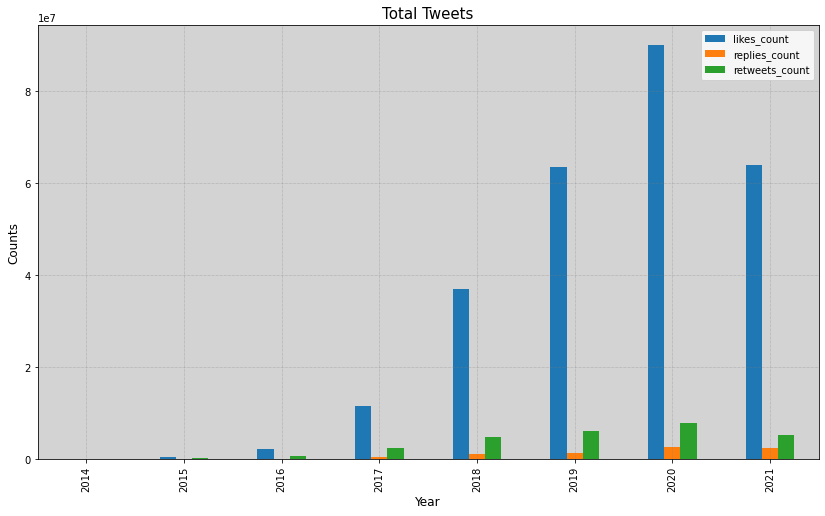

In [15]:
ax=df1.groupby(by=['year']).sum().tail(8).plot(kind='bar',figsize=(14,8))
ax.grid(color='grey', linestyle='dotted', linewidth=0.5)
ax.set_title('Total Tweets',size=15)
ax.set_facecolor('lightgrey')
ax.set_ylabel('Counts',size=12)
ax.set_xlabel('Year',size=12)

### Here we have in the same graph how many likes, replies and retweets follow his tweets per year. In 2021 is lower than 2020 since it's until April. With the same ratio these values will be higher than 2020 by the end of the year

In [16]:
df1.groupby(by=['year']).sum()

likes_count  replies_count  retweets_count
year                                            
2010         4710            398             349
2011       292316           3973           56398
2012        94622           8723           42760
2013        77136          27776          112147
2014       170658          23544          135146
2015       584741          56613          356838
2016      2229218         116719          721853
2017     11714163         449755         2519931
2018     37091865        1159393         4933960
2019     63438354        1293614         6280793
2020     89998169        2806084         7868202
2021     64010879        2587654         5320630

In [17]:
df1['tweet']=df1['tweet'].str.lower()
df1['tweet'].head()

<ipython-input-17-77a3ee56c415>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['tweet']=df1['tweet'].str.lower()


date
2021-04-11    @vincent13031925 for now. costs are decreasing...
2021-04-11                             love this beautiful shot
2021-04-11    @agnostoxxx @cathiedwood @arkinvest trust the ...
2021-04-11                   the art in cyberpunk is incredible
2021-04-11                                      @itsallrisky 🤣🤣
Name: tweet, dtype: object

In [18]:
df1t=df1[df1['tweet'].str.contains('tesla'or'tsla')]
df1b=df1[df1['tweet'].str.contains('bitcoin' or 'btc')]
df1d=df1[df1['tweet'].str.contains('doge')]

In [19]:
df1t.shape

(2378, 8)

In [20]:
df1b.shape
#df1b.head(40)

(16, 8)

In [21]:
df1d.shape

(41, 8)

Text(0.5, 0, 'Year')

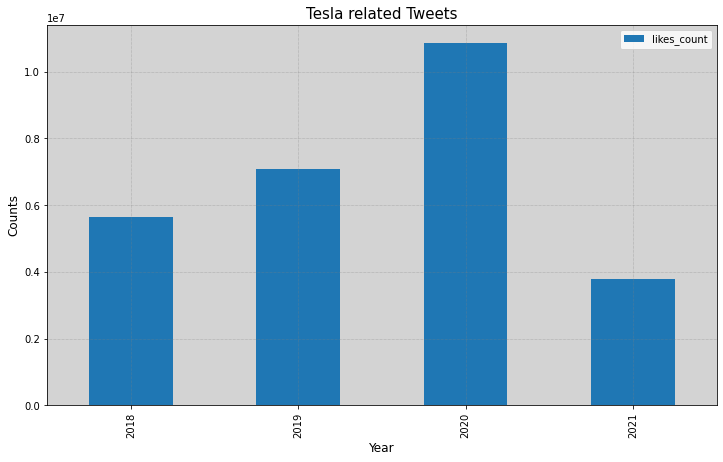

In [22]:
ax1=df1t.groupby(by=['year']).sum().tail(4).plot(kind='bar',y='likes_count',figsize=(12,7))
ax1.set_title('Tesla related Tweets',size=15)
ax1.grid(color='grey', linestyle='dotted', linewidth=0.5)
ax1.set_facecolor('lightgrey')
ax1.set_ylabel('Counts',size=12)
ax1.set_xlabel('Year',size=12)

### Same plot as before but only for Tesla tweets and likes.

In [23]:
df1.head(2)

time                                              tweet  \
date                                                                      
2021-04-11  18:50:33  @vincent13031925 for now. costs are decreasing...   
2021-04-11  18:48:58                           love this beautiful shot   

            likes_count  replies_count  retweets_count photos  \
date                                                            
2021-04-11        15281            640             444     []   
2021-04-11        71161           2464            1517     []   

                                                     reply_to  year  
date                                                                 
2021-04-11  [{'screen_name': 'vincent13031925', 'name': 'V...  2021  
2021-04-11                                                 []  2021

In [24]:
reply=(df1['reply_to']=='[]').value_counts()
replyt=(df1t['reply_to']=='[]').value_counts()
replyb=(df1b['reply_to']=='[]').value_counts()
replyd=(df1d['reply_to']=='[]').value_counts()

In [25]:
replyt

False    1760
True      618
Name: reply_to, dtype: int64

In [26]:
reply.index=['Reply','Tweet']
replyt.index=['Reply','Tweet']
replyb.index=['Reply','Tweet']
replyd.index=['Reply','Tweet']

Text(0.5, 1.0, 'Dogecoin Tweets')

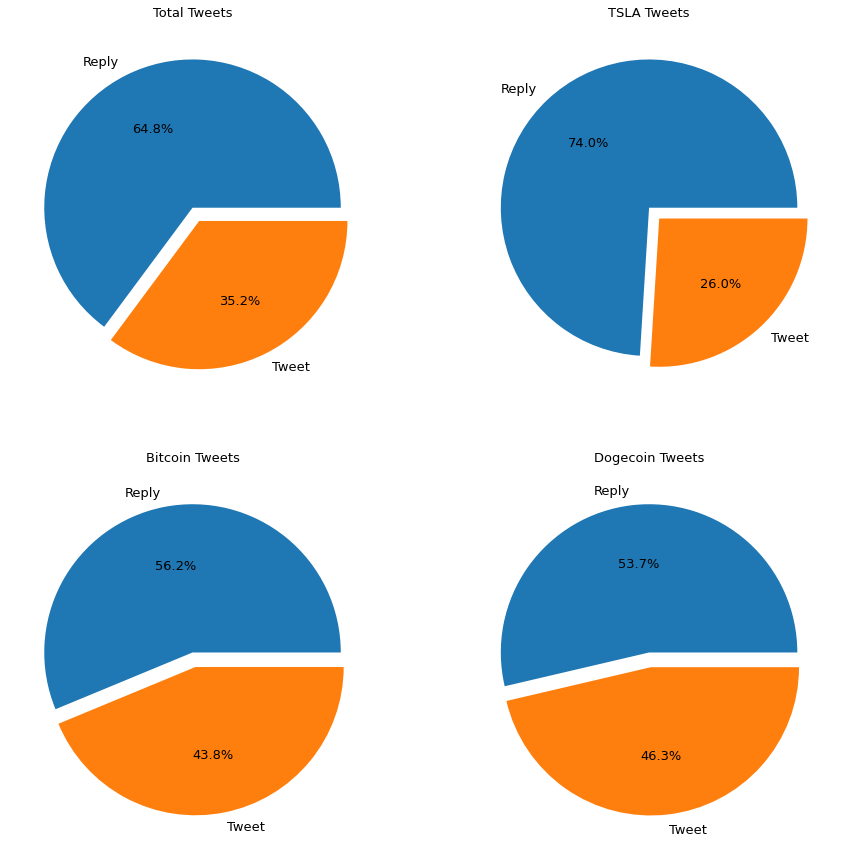

In [27]:
fig=plt.figure(figsize=(15,15))
#fig.suptitle('Elons tweet posts Vs replys',fontsize=18)
ax1=fig.add_subplot(2,2,1)
ax1=reply.plot(kind='pie',labels=reply.index,explode=[0,0.1],ylabel='',autopct='%1.1f%%',fontsize=13)
ax1.set_title('Total Tweets',fontsize=13)
ax2=fig.add_subplot(2,2,2)
ax2=replyt.plot(kind='pie',labels=replyt.index,explode=[0,0.1],ylabel='',autopct='%1.1f%%',fontsize=13)
ax2.set_title('TSLA Tweets',fontsize=13)
ax3=fig.add_subplot(2,2,3)
ax3=replyb.plot(kind='pie',labels=replyb.index,explode=[0,0.1],ylabel='',autopct='%1.1f%%',fontsize=13)
ax3.set_title('Bitcoin Tweets',fontsize=13)
ax4=fig.add_subplot(2,2,4)
ax4=replyd.plot(kind='pie',labels=replyd.index,explode=[0,0.1],ylabel='',autopct='%1.1f%%',fontsize=13)
ax4.set_title('Dogecoin Tweets',fontsize=13)

### Before examining each price, we devided the tweets to Tesla related Tweets, Bitcoin related and Dogecoin related tweets. We see in the pie charts for all the tweets as well as for each stock prices related tweets, what is the percentage of actual tweets (posts) or replys to other Twitter users

In [28]:
(df1t['reply_to']=='[]').value_counts()

False    1760
True      618
Name: reply_to, dtype: int64

In [29]:
df1t[df1t['reply_to']=='[]'].head()

time                                              tweet  \
date                                                                      
2021-04-08  12:41:16  thanks tesla suppliers for providing us with c...   
2021-03-24  09:09:34  tesla is using only internal &amp; open source...   
2021-03-24  09:02:40               you can now buy a tesla with bitcoin   
2021-03-14  16:00:29  play your favorite song in a tesla &amp; turn ...   
2021-03-07  00:47:09  availability varies by region due to regulator...   

            likes_count  replies_count  retweets_count photos reply_to  year  
date                                                                          
2021-04-08       187065           5384            6225     []       []  2021  
2021-03-24       179638           4675           20572     []       []  2021  
2021-03-24       902515          36954          115994     []       []  2021  
2021-03-14       170455           8327            8287     []       []  2021  
2021-03-07        32106           1425            1281     []       []  2021

In [30]:
dft.head(3)

Date   Open   High    Low  Close  Adj Close    Volume
0  2010-06-29  3.800  5.000  3.508  4.778      4.778  93831500
1  2010-06-30  5.158  6.084  4.660  4.766      4.766  85935500
2  2010-07-01  5.000  5.184  4.054  4.392      4.392  41094000

In [31]:
dft['Date']=dft['Date'].astype('datetime64')
dft.set_index('Date',inplace=True)

In [32]:
dft.tail(3)

Open        High         Low       Close   Adj Close  \
Date                                                                     
2021-10-06  776.200012  786.659973  773.219971  782.750000  782.750000   
2021-10-07  785.460022  805.000000  783.380005  793.609985  793.609985   
2021-10-08  796.210022  796.380005  780.909973  785.489990  785.489990   

              Volume  
Date                  
2021-10-06  14632800  
2021-10-07  19195800  
2021-10-08  16711100

In [33]:
import matplotlib.dates as mdates

## Tesla stock Price

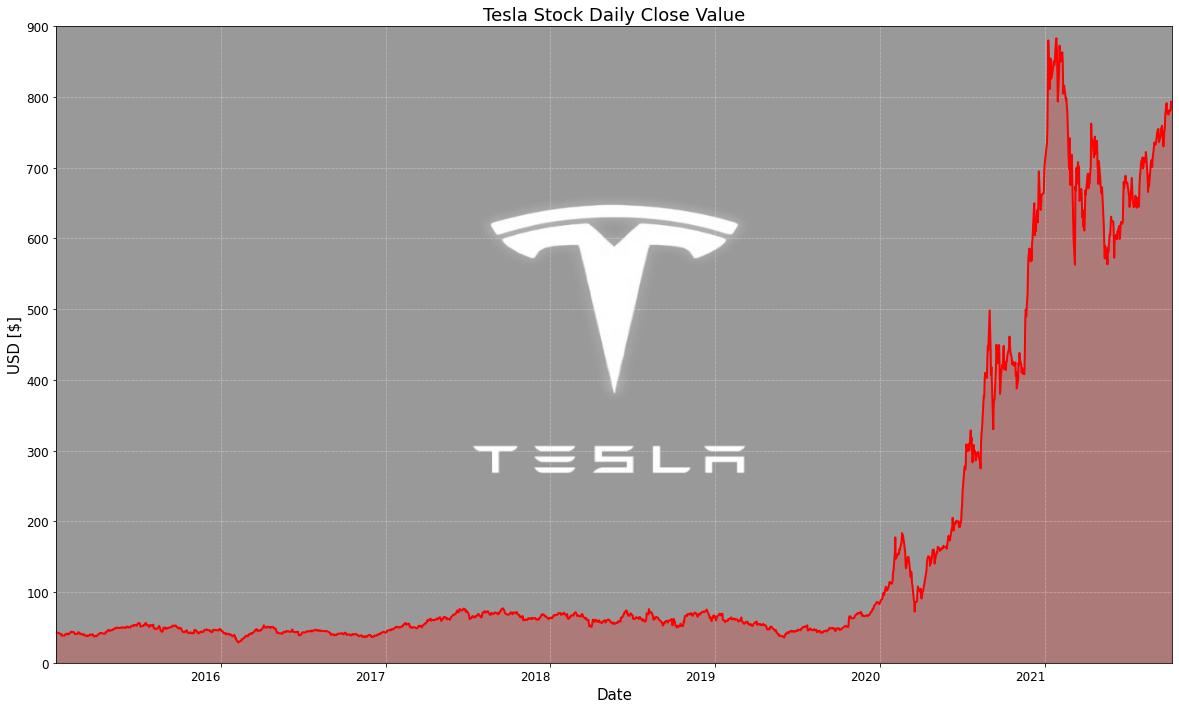

In [34]:
x_lims = list(map(dt.datetime.fromtimestamp, [1420093911, 1633718221]))
x_lims = mdates.date2num(x_lims)
img = plt.imread("blacklogo.png")
ax=dft['Close'][dft.index.year>2013].plot(figsize=(20,13),color='red',linewidth=2)
ax.grid(color='white', linestyle='dotted', linewidth=0.5)
ax.set_title('Tesla Stock Daily Close Value',fontsize=18)
ax.set_ylabel('USD [$]',fontsize=15)
ax.set_xlabel('Date',fontsize=15)
ax.fill_between(dft.index,dft['Close'],color='red',alpha=.2)
ax.tick_params(axis='x',which='major',labelsize=12,labelrotation=0)
ax.tick_params(axis='y',which='major',labelsize=12)
ax.imshow(img,aspect='auto',alpha=0.4,extent=[x_lims[0],x_lims[1],0,900])

## Tesla stock Price after 2018

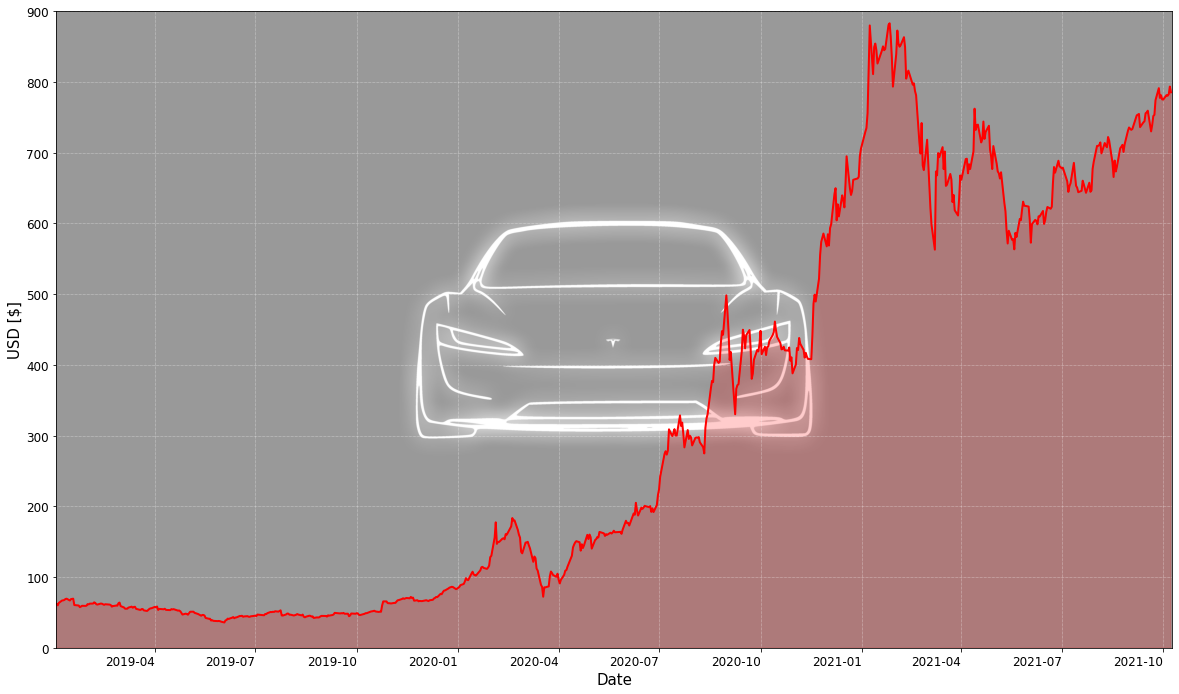

In [35]:
x_lims = list(map(dt.datetime.fromtimestamp, [1546324311, 1633718221]))
x_lims = mdates.date2num(x_lims)
img = plt.imread("blacktesla.png")
ax=dft['Close'][dft.index.year>2018].plot(figsize=(20,13),color='red',linewidth=2)
ax.grid(color='white', linestyle='dotted', linewidth=0.5)
#ax.set_title('Tesla Stock Daily Close Value',fontsize=18)
ax.set_ylabel('USD [$]',fontsize=15)
ax.set_xlabel('Date',fontsize=15)
ax.fill_between(dft.index,dft['Close'],color='red',alpha=.2)
ax.tick_params(axis='x',which='major',labelsize=12,labelrotation=0)
ax.tick_params(axis='y',which='major',labelsize=12)
ax.imshow(img,aspect='auto',alpha=0.4,extent=[x_lims[0],x_lims[1],0,900])

In [36]:
dfb['Date']=dfb['Date'].astype('datetime64')
dfb.set_index('Date',inplace=True)

In [37]:
dfb.head(2)

Open        High         Low       Close   Adj Close  \
Date                                                                     
2014-09-17  465.864014  468.174011  452.421997  457.334015  457.334015   
2014-09-18  456.859985  456.859985  413.104004  424.440002  424.440002   

                Volume  
Date                    
2014-09-17  21056800.0  
2014-09-18  34483200.0

In [38]:
dfb.tail(2)

Open          High           Low         Close  \
Date                                                                 
2021-10-15  57345.902344  62757.128906  56868.144531  61593.949219   
2021-10-16  61495.410156  62232.257813  61110.839844  61628.851563   

               Adj Close        Volume  
Date                                    
2021-10-15  61593.949219  5.178008e+10  
2021-10-16  61628.851563  4.469134e+10

## Bitcoin price

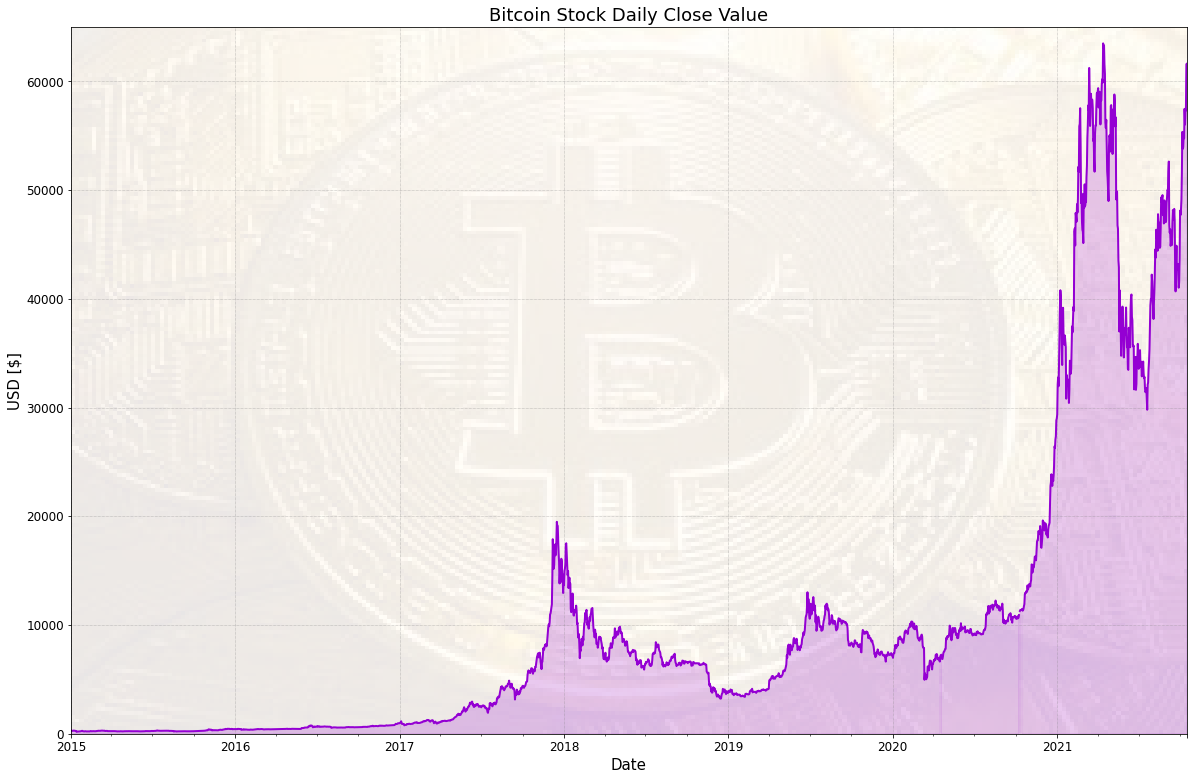

In [39]:
x_lims = list(map(dt.datetime.fromtimestamp, [1420093911, 1641018711]))
x_lims = mdates.date2num(x_lims)
img = plt.imread("bitcoin.jfif")
ax=dfb['Close'][dfb.index.year>2014].plot(figsize=(20,13),color='darkviolet',linewidth=2)
ax.grid(color='grey', linestyle='dotted', linewidth=0.5)
ax.set_title('Bitcoin Stock Daily Close Value',fontsize=18)
ax.set_ylabel('USD [$]',fontsize=15)
ax.set_xlabel('Date',fontsize=15)
ax.fill_between(dfb.index,dfb['Close'],color='darkviolet',alpha=.2)
ax.tick_params(axis='x',which='major',labelsize=12,labelrotation=0)
ax.tick_params(axis='y',which='major',labelsize=12)
ax.imshow(img,aspect='auto',alpha=0.1,extent=[x_lims[0],x_lims[1],0,65000])

## Bitcoin price after 2016

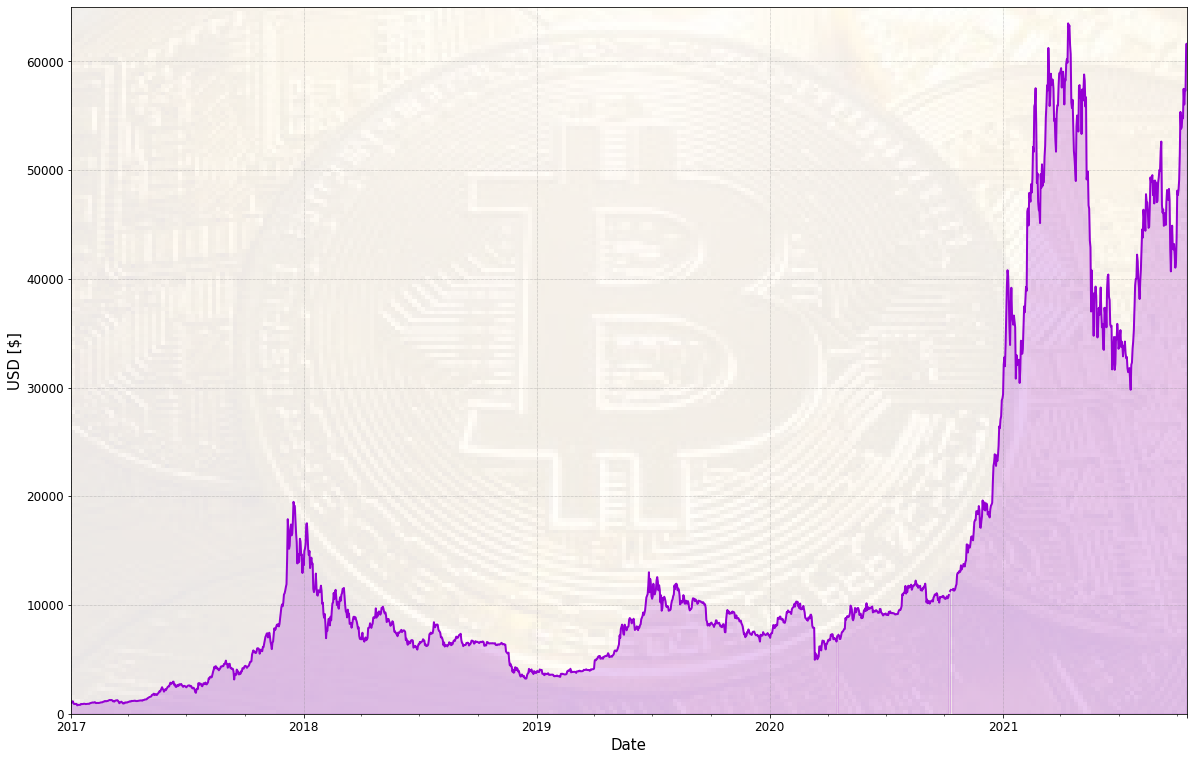

In [40]:
x_lims = list(map(dt.datetime.fromtimestamp, [1483252311, 1641018711]))
x_lims = mdates.date2num(x_lims)
img = plt.imread("bitcoin.jfif")
ax=dfb['Close'][dfb.index.year>2016].plot(figsize=(20,13),color='darkviolet',linewidth=2)
ax.grid(color='grey', linestyle='dotted', linewidth=0.5)
#ax.set_title('Bitcoin Stock Daily Close Value',fontsize=18)
ax.set_ylabel('USD [$]',fontsize=15)
ax.set_xlabel('Date',fontsize=15)
ax.fill_between(dfb.index,dfb['Close'],color='darkviolet',alpha=.2)
ax.tick_params(axis='x',which='major',labelsize=12,labelrotation=0)
ax.tick_params(axis='y',which='major',labelsize=12)
ax.imshow(img,aspect='auto',alpha=0.1,extent=[x_lims[0],x_lims[1],0,65000])

In [41]:
dfd['Date']=dfd['Date'].astype('datetime64')
dfd.set_index('Date',inplace=True)

In [42]:
dfd.head(2)

Open      High       Low     Close  Adj Close     Volume
Date                                                                    
2014-09-17  0.000293  0.000299  0.000260  0.000268   0.000268  1463600.0
2014-09-18  0.000268  0.000325  0.000267  0.000298   0.000298  2215910.0

## Dogecoin price

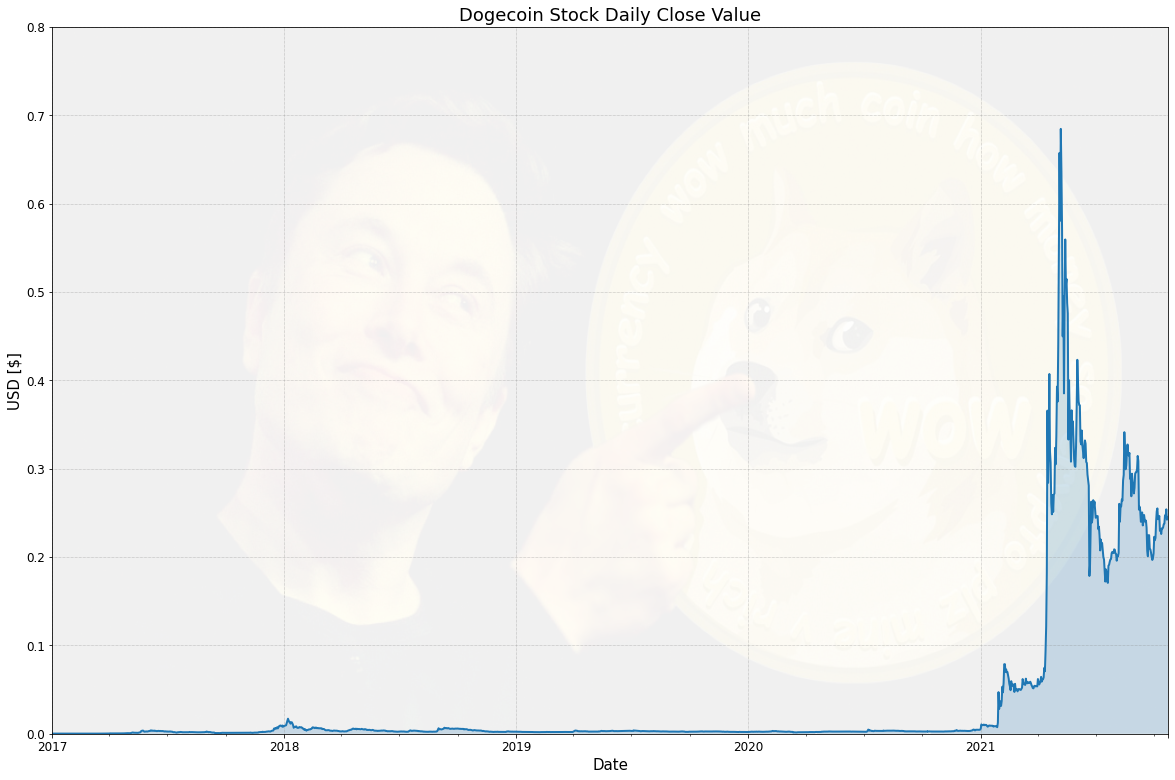

In [43]:
x_lims = list(map(dt.datetime.fromtimestamp, [1483252311, 1641018711]))
x_lims = mdates.date2num(x_lims)
img = plt.imread("doge1.jpg")
ax=dfd['Close'][dfd.index.year>2016].plot(figsize=(20,13),linewidth=2)
ax.grid(color='grey', linestyle='dotted', linewidth=0.5)
ax.set_title('Dogecoin Stock Daily Close Value',fontsize=18)
ax.set_ylabel('USD [$]',fontsize=15)
ax.set_xlabel('Date',fontsize=15)
ax.fill_between(dfd.index,dfd['Close'],alpha=.2)
ax.tick_params(axis='x',which='major',labelsize=12,labelrotation=0)
ax.tick_params(axis='y',which='major',labelsize=12)
ax.imshow(img,aspect='auto',alpha=0.06,extent=[x_lims[0],x_lims[1],0,0.8])

## Dogecoin price after 2020

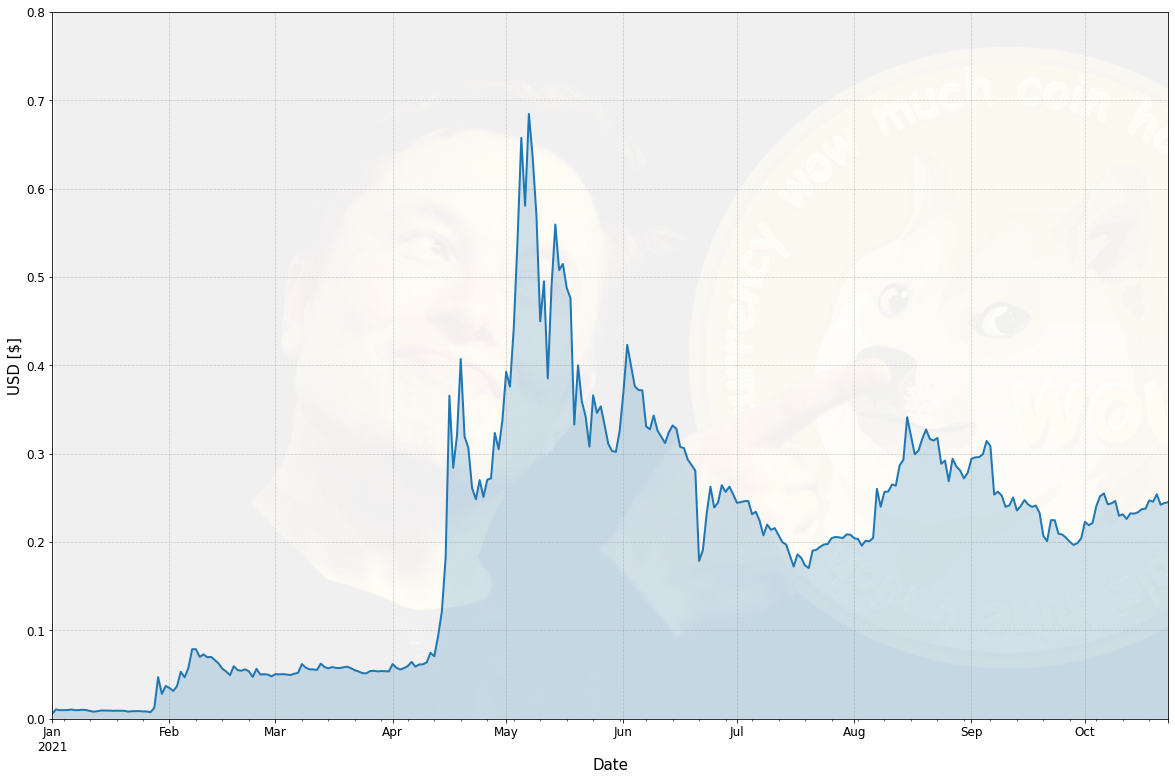

In [44]:
x_lims = list(map(dt.datetime.fromtimestamp, [1609482711, 1641018711]))
x_lims = mdates.date2num(x_lims)
img = plt.imread("doge1.jpg")
ax=dfd['Close'][dfd.index.year>2020].plot(figsize=(20,13),linewidth=2)
ax.grid(color='grey', linestyle='dotted', linewidth=0.5)
#ax.set_title('Dogecoin Stock Daily Close Value',fontsize=18)
ax.set_ylabel('USD [$]',fontsize=15)
ax.set_xlabel('Date',fontsize=15)
ax.fill_between(dfd.index,dfd['Close'],alpha=.2)
ax.tick_params(axis='x',which='major',labelsize=12,labelrotation=0)
ax.tick_params(axis='y',which='major',labelsize=12)
ax.imshow(img,aspect='auto',alpha=0.06,extent=[x_lims[0],x_lims[1],0,0.8])

In [45]:
import plotly.graph_objects as go

In [46]:
dft.head(2)

Open   High    Low  Close  Adj Close    Volume
Date                                                       
2010-06-29  3.800  5.000  3.508  4.778      4.778  93831500
2010-06-30  5.158  6.084  4.660  4.766      4.766  85935500

## Below we have the candlestick chart for tesla which is also interactive.

In [47]:
dft2=(dft[dft.index.year>2019]).copy()
fig = go.Figure(data=[go.Candlestick(x=(dft2.index),
                open=dft2['Open'],
                high=dft2['High'],
                low=dft2['Low'],
                close=dft2['Close'])],
                layout=go.Layout(height=700, width=950,title='Tesla Candlestick Chart'))
fig.show()

## Bitcoin Candlestic Chart

In [48]:
dfb2=(dfb[dfb.index.year>2019]).copy()
fig = go.Figure(data=[go.Candlestick(x=(dfb2.index),
                open=dfb2['Open'],
                high=dfb2['High'],
                low=dfb2['Low'],
                close=dfb2['Close'])],
                layout=go.Layout(height=700, width=950,title='Bitcoin Candlestick Chart'))
fig.show()

## Dogecoin Candlestic Chart

In [49]:
dfd2=(dfd[dfd.index.year>2020]).copy()
fig = go.Figure(data=[go.Candlestick(x=(dfd2.index),
                open=dfd2['Open'],
                high=dfd2['High'],
                low=dfd2['Low'],
                close=dfd2['Close'])],
                layout=go.Layout(height=700, width=950,title='Dogecoin Candlestick Chart'))
fig.show()

## Now we want to see the most used words in the tweets of Elon Musk in total and when he tweets about tesla, bitcoin or dogecoin. We check this using Word Clouds

In [50]:
df1t.shape[0]

2378

In [51]:
df1t.head(2)

time                                              tweet  \
date                                                                      
2021-04-10  11:32:35  @tesla_adri @wholemarsblog these things are be...   
2021-04-10  04:07:04  @austinteslaclub @owensparks_ @wholemarsblog g...   

            likes_count  replies_count  retweets_count photos  \
date                                                            
2021-04-10         2310            204             114     []   
2021-04-10         2487            210             138     []   

                                                     reply_to  year  
date                                                                 
2021-04-10  [{'screen_name': 'tesla_adri', 'name': 'Tesla_...  2021  
2021-04-10  [{'screen_name': 'AustinTeslaClub', 'name': 'T...  2021

na valw kai gia oula ta tweets

In [52]:
tesla_tweet=[]
i=0
for i in range(df1t.shape[0]):
    tesla_tweet.append(df1t.iloc[i,1])
    i+=1  

In [53]:
bitcoin_tweet=[]
i=0
for i in range(df1b.shape[0]):
    bitcoin_tweet.append(df1b.iloc[i,1])
    i+=1  

In [54]:
dogecoin_tweet=[]
i=0
for i in range(df1d.shape[0]):
    dogecoin_tweet.append(df1d.iloc[i,1])
    i+=1 

In [55]:
elon_tweet=[]
i=0
for i in range(df1.shape[0]):
    elon_tweet.append(df1.iloc[i,1])
    i+=1 

In [56]:
from PIL import Image
import numpy as np
tesla_mask = np.array(Image.open("model3.jpg"))
bitcoin_mask=np.array(Image.open("bitco.png"))
dogecoin_mask=np.array(Image.open("doge3.png"))
elon_mask=np.array(Image.open('elon4.png'))

In [57]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

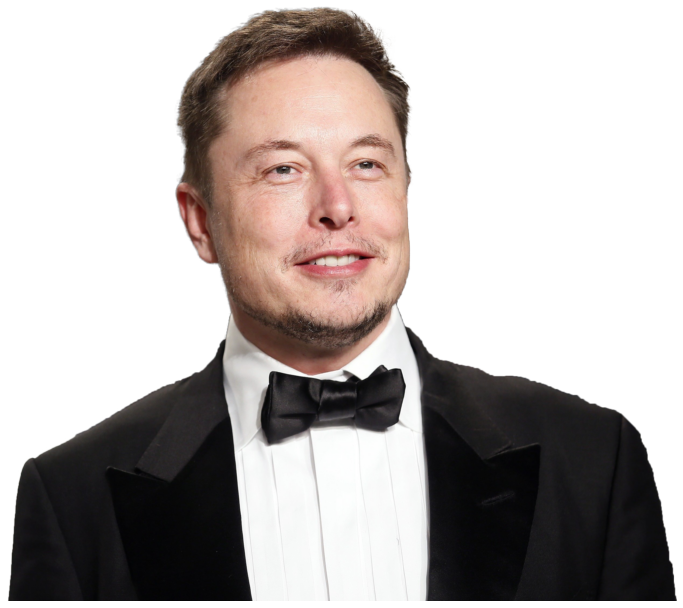

In [58]:
fig = plt.figure()
fig.set_figwidth(12) # set width
fig.set_figheight(16) # set height

plt.imshow(elon_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

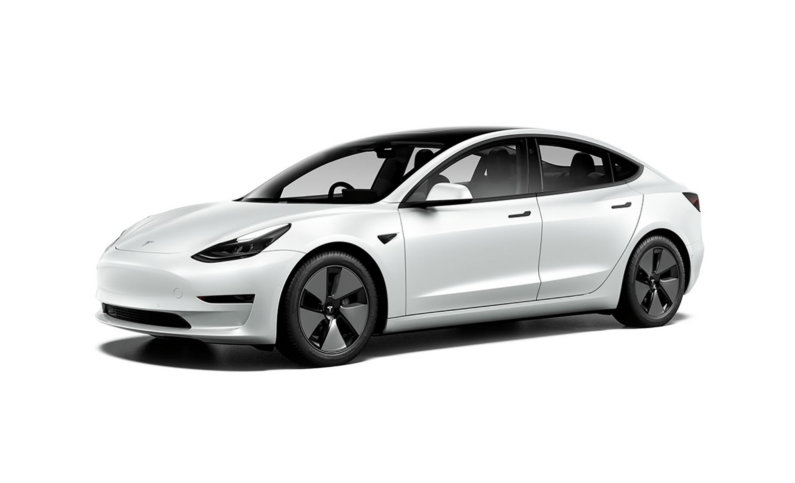

In [59]:
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

plt.imshow(tesla_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

In [60]:
def listToString(s): 
    
    # initialize an empty string
    str1 = "" 
    
    # traverse in the string  
    for ele in s: 
        str1 += ele  
    
    # return string  
    return str1 
        
        
# Driver code    
tesla_tweet=(listToString(tesla_tweet)) 
bitcoin_tweet=(listToString(bitcoin_tweet)) 
dogecoin_tweet=(listToString(dogecoin_tweet)) 
elon_tweet=(listToString(elon_tweet)) 

In [61]:
stopwords.add('@') # add the words said to stopwords
stopwords.add('https') 

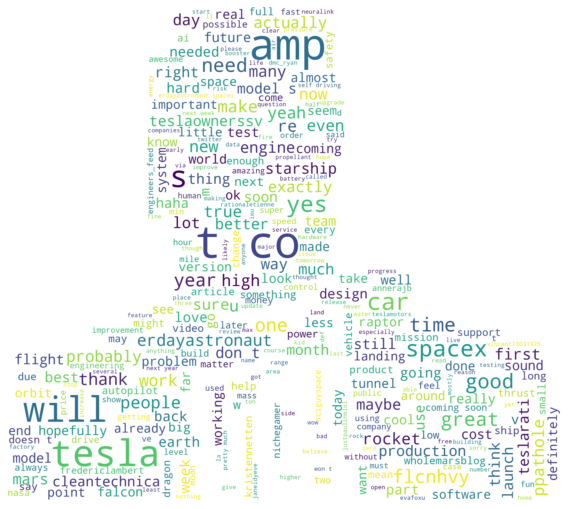

In [62]:
# instantiate a word cloud object
elon_wc = WordCloud(background_color='white', max_words=300, mask=elon_mask, stopwords=stopwords)

# generate the word cloud
elon_wc.generate(elon_tweet)

# display the word cloud
fig = plt.figure()
fig.set_figwidth(10) # set width
fig.set_figheight(14) # set height

plt.imshow(elon_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

#### We can see above that among all of Elon's tweets, the most used words like "tesla", "car", "mars", "spacex", "launch" etc

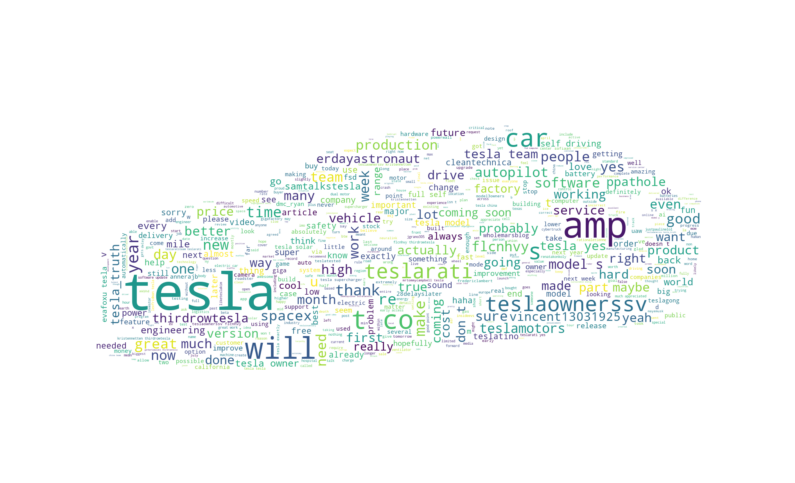

In [63]:
# instantiate a word cloud object
tesla_wc = WordCloud(background_color='white', max_words=600, mask=tesla_mask, stopwords=stopwords)

# generate the word cloud
tesla_wc.generate(tesla_tweet)

# display the word cloud
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

plt.imshow(tesla_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

#### When he tweets about tesla, obviously the most used word is "tesla". Other words are "car", "teslaowner" and "will" that maybe show that he give promises etc.

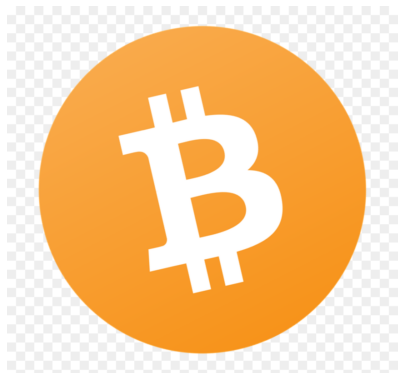

In [64]:
fig = plt.figure()
fig.set_figwidth(7) # set width
fig.set_figheight(11) # set height

plt.imshow(bitcoin_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

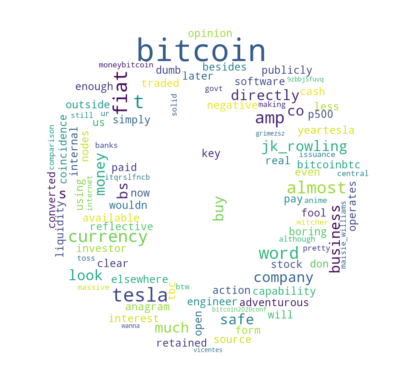

In [65]:
# instantiate a word cloud object
bitcoin_wc = WordCloud(background_color='white', max_words=1000, mask=bitcoin_mask, stopwords=stopwords)

# generate the word cloud
bitcoin_wc.generate(bitcoin_tweet)

# display the word cloud
fig = plt.figure()
fig.set_figwidth(7) # set width
fig.set_figheight(11) # set height

plt.imshow(bitcoin_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

#### When he tweets about Dogecoin he uses a lot "publicly", "currency", but also "tesla" etc. 

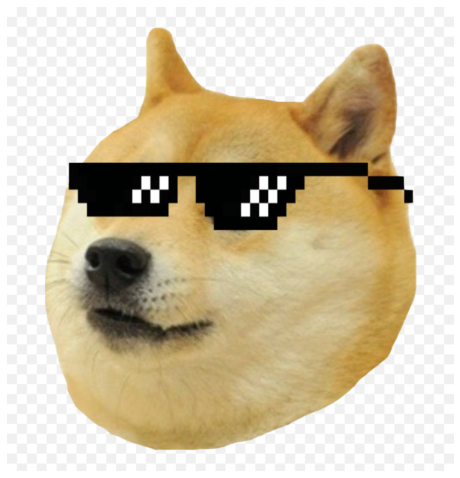

In [66]:
fig = plt.figure()
fig.set_figwidth(8) # set width
fig.set_figheight(12) # set height

plt.imshow(dogecoin_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

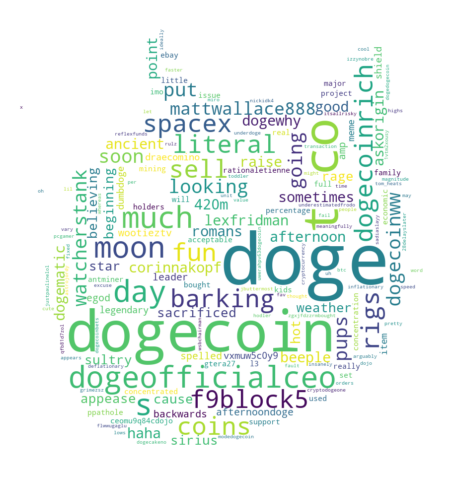

In [67]:
# instantiate a word cloud object
dogecoin_wc = WordCloud(background_color='white', max_words=500, mask=dogecoin_mask, stopwords=stopwords)

# generate the word cloud
dogecoin_wc.generate(dogecoin_tweet)

# display the word cloud
fig = plt.figure()
fig.set_figwidth(8) # set width
fig.set_figheight(12) # set height

plt.imshow(dogecoin_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

#### Finally when he posts about dogecoin he uses: "spacex", coins", "sell" etc.

## Later in this analysis we investigate the sentiment of the tweets
#### First sentiment analysis of total tweets and then for Tesla, Bitcoin and Dogecoin

In [68]:
import re

# Clean The Data
def cleantext(text):
    text = re.sub(r"@[A-Za-z0-9]+", "", text) # Remove Mentions
    text = re.sub(r"#", "", text) # Remove Hashtags Symbol
    text = re.sub(r"RT[\s]+", "", text) # Remove Retweets
    text = re.sub(r"https?:\/\/\S+", "", text) # Remove The Hyper Link
    
    return text

In [69]:
import nltk
#nltk.download()

In [70]:
from nltk.sentiment import SentimentIntensityAnalyzer

In [71]:
sia = SentimentIntensityAnalyzer()

In [72]:
df1['tweet_clean']=df1['tweet'].apply(cleantext)
df1t['tweet_clean']=df1t['tweet'].apply(cleantext)
df1b['tweet_clean']=df1b['tweet'].apply(cleantext)
df1d['tweet_clean']=df1d['tweet'].apply(cleantext)

<ipython-input-72-a2202d136a49>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-72-a2202d136a49>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-72-a2202d136a49>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-72-a2202d1

In [73]:
df1['neg']=0
df1['neu']=0
df1['pos']=0
df1t['neg']=0
df1t['neu']=0
df1t['pos']=0
df1b['neg']=0
df1b['neu']=0
df1b['pos']=0
df1d['neg']=0
df1d['neu']=0
df1d['pos']=0

<ipython-input-73-962cbeb3a9ea>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-73-962cbeb3a9ea>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-73-962cbeb3a9ea>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-73-962cbeb

In [74]:
pd.set_option('display.max_colwidth',80)
df1[['tweet','tweet_clean']].head(5)

tweet  \
date                                                                  
2021-04-11  @vincent13031925 for now. costs are decreasing rapidly.   
2021-04-11                                 love this beautiful shot   
2021-04-11      @agnostoxxx @cathiedwood @arkinvest trust the shrub   
2021-04-11                       the art in cyberpunk is incredible   
2021-04-11                                          @itsallrisky 🤣🤣   

                                        tweet_clean  
date                                                 
2021-04-11   for now. costs are decreasing rapidly.  
2021-04-11                 love this beautiful shot  
2021-04-11                          trust the shrub  
2021-04-11       the art in cyberpunk is incredible  
2021-04-11                                       🤣🤣

In [75]:
pd.set_option('display.max_colwidth', 80)
df1t[['tweet','tweet_clean']].head()

tweet  \
date                                                                                          
2021-04-10  @tesla_adri @wholemarsblog these things are best thought of as probabilities...   
2021-04-10  @austinteslaclub @owensparks_ @wholemarsblog good point.   next major softwa...   
2021-04-10  @teslaownerssv @neuralink turns out 🐒 love video games &amp; snacks just lik...   
2021-04-09                                                                  @teslagong yeah   
2021-04-09  @ihearttesla absolutely doable. possibly as soon as neuralink device version...   

                                                                                tweet_clean  
date                                                                                         
2021-04-10  _adri  these things are best thought of as probabilities. there are 5 forwar...  
2021-04-10   _  good point.   next major software rev will do much better with automatin...  
2021-04-10                          turns out 🐒 love video games &amp; snacks just like us!  
2021-04-09                                                                             yeah  
2021-04-09   absolutely doable. possibly as soon as neuralink device version 2, highly l...

In [76]:
df1t.head(2)

time  \
date                   
2021-04-10  11:32:35   
2021-04-10  04:07:04   

                                                                                      tweet  \
date                                                                                          
2021-04-10  @tesla_adri @wholemarsblog these things are best thought of as probabilities...   
2021-04-10  @austinteslaclub @owensparks_ @wholemarsblog good point.   next major softwa...   

            likes_count  replies_count  retweets_count photos  \
date                                                            
2021-04-10         2310            204             114     []   
2021-04-10         2487            210             138     []   

                                                                                   reply_to  \
date                                                                                          
2021-04-10  [{'screen_name': 'tesla_adri', 'name': 'Tesla_Adri', 'id': '1321117860844965...   
2021-04-10  [{'screen_name': 'AustinTeslaClub', 'name': 'Tesla Owners of Austin', 'id': ...   

            year  \
date               
2021-04-10  2021   
2021-04-10  2021   

                                                                                tweet_clean  \
date                                                                                          
2021-04-10  _adri  these things are best thought of as probabilities. there are 5 forwar...   
2021-04-10   _  good point.   next major software rev will do much better with automatin...   

            neg  neu  pos  
date                       
2021-04-10    0    0    0  
2021-04-10    0    0    0

In [77]:
df1t.iloc[0,8]

'_adri  these things are best thought of as probabilities. there are 5 forward-facing cameras. it is highly likely that at least one of them will see multiple cars ahead.'

In [78]:
df1d.head(2)

time  \
date                   
2021-04-08  23:45:19   
2021-04-01  13:25:23   

                                                                    tweet  \
date                                                                        
2021-04-08   @dogeofficialceo @watcherstank @spacex looking at pups soon!   
2021-04-01  spacex is going to put a literal dogecoin on the literal moon   

            likes_count  replies_count  retweets_count photos  \
date                                                            
2021-04-08         4081            454             467     []   
2021-04-01       535373          25947           50139     []   

                                                                                   reply_to  \
date                                                                                          
2021-04-08  [{'screen_name': 'dogeofficialceo', 'name': 'Sir Doge of the Coin 🐶', 'id': ...   
2021-04-01                                                                               []   

            year  \
date               
2021-04-08  2021   
2021-04-01  2021   

                                                              tweet_clean  \
date                                                                        
2021-04-08                                          looking at pups soon!   
2021-04-01  spacex is going to put a literal dogecoin on the literal moon   

            neg  neu  pos  
date                       
2021-04-08    0    0    0  
2021-04-01    0    0    0

In [79]:
df1.iloc[0,11]

0

In [80]:
i=0
for i in range (df1.shape[0]):
    x=sia.polarity_scores(df1.iloc[i,8])
    df1.iloc[i,9]=x['neg']
    df1.iloc[i,10]=x['neu']
    df1.iloc[i,11]=x['pos']
    i+=1

c:\users\demetris englezos\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [81]:
i=0
for i in range (df1t.shape[0]):
    x=sia.polarity_scores(df1t.iloc[i,8])
    df1t.iloc[i,9]=x['neg']
    df1t.iloc[i,10]=x['neu']
    df1t.iloc[i,11]=x['pos']
    i+=1

In [82]:
i=0
for i in range (df1b.shape[0]):
    x=sia.polarity_scores(df1b.iloc[i,8])
    df1b.iloc[i,9]=x['neg']
    df1b.iloc[i,10]=x['neu']
    df1b.iloc[i,11]=x['pos']
    i+=1

In [83]:
i=0
for i in range (df1d.shape[0]):
    x=sia.polarity_scores(df1d.iloc[i,8])
    df1d.iloc[i,9]=x['neg']
    df1d.iloc[i,10]=x['neu']
    df1d.iloc[i,11]=x['pos']
    i+=1

In [84]:
df1t[['tweet_clean','neg','neu','pos']].head(5)

tweet_clean  \
date                                                                                          
2021-04-10  _adri  these things are best thought of as probabilities. there are 5 forwar...   
2021-04-10   _  good point.   next major software rev will do much better with automatin...   
2021-04-10                          turns out 🐒 love video games &amp; snacks just like us!   
2021-04-09                                                                             yeah   
2021-04-09   absolutely doable. possibly as soon as neuralink device version 2, highly l...   

            neg    neu    pos  
date                           
2021-04-10  0.0  0.865  0.135  
2021-04-10  0.0  0.823  0.177  
2021-04-10  0.0  0.534  0.466  
2021-04-09  0.0  0.000  1.000  
2021-04-09  0.0  1.000  0.000

In [85]:
df1[['tweet_clean','neg','neu','pos']].head(5)

tweet_clean  neg    neu    pos
date                                                                  
2021-04-11   for now. costs are decreasing rapidly.  0.0  1.000  0.000
2021-04-11                 love this beautiful shot  0.0  0.198  0.802
2021-04-11                          trust the shrub  0.0  0.377  0.623
2021-04-11       the art in cyberpunk is incredible  0.0  1.000  0.000
2021-04-11                                       🤣🤣  0.0  1.000  0.000

In [86]:
type(df1[['neg','neu','pos']].mean()/(df1[['neg','neu','pos']].mean().sum()/100))

pandas.core.series.Series

In [87]:
type(df1[['neg','neu','pos']].mean())

pandas.core.series.Series

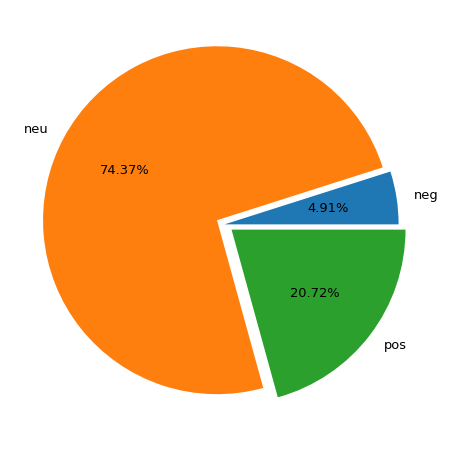

In [88]:
ax=(df1[['neg','neu','pos']].mean()/(df1[['neg','neu','pos']].mean().sum()/100)).plot(kind='pie',figsize=(12,8),explode=[0,0.05,0.05],ylabel='',autopct='%1.2f%%',fontsize=13)
#ax.set_title('Sentiment analysis for Elon Musk tweets',fontsize=16)

### Sentiment analysis showed in the beginning that there are a lot of neutral tweets. This makes sense since most of the tweets are short and the related libraries can't recognise if the tweet is positive or negative. However out of the tweets that we got positive or negative results, we see that Elon's tweets tend to be more positive.

In [89]:
negt=df1t['neg'][df1t['neg']>0].sum()/(df1t.shape[0])
negb=df1b['neg'][df1b['neg']>0].sum()/(df1b.shape[0])
negd=df1d['neg'][df1d['neg']>0].sum()/(df1d.shape[0])

In [90]:
neu=df1t['neu'].sum()

In [91]:
post=df1t['pos'][df1t['pos']>0].sum()/(df1t.shape[0])
posb=df1b['pos'][df1b['pos']>0].sum()/(df1b.shape[0])
posd=df1d['pos'][df1d['pos']>0].sum()/(df1d.shape[0])

In [92]:
neut=df1t['neu'][df1t['neu']>0].sum()/(df1t.shape[0])
neub=df1b['neu'][df1b['neu']>0].sum()/(df1b.shape[0])
neud=df1d['neu'][df1d['neu']>0].sum()/(df1d.shape[0])

In [93]:
df1d['neg'][df1d['neg']>0].mean()

0.36233333333333334

In [94]:
df1d['pos'][df1d['pos']>0].mean()

0.32827272727272727

In [95]:
scoret=[negt,neut ,post]
scoreb=[negb,neub,posb]
scored=[negd,neud,posd]
names=['negative','neutral','positive']

na valw kai ta antistixa gia bitcoin kai doge \
episis na kanw scatter plot me positive negative \
episis otan tha valw kathetes grames mazi me stock prices na exei allo xroma an einai arnitiko i thetiko

In [96]:
sent=pd.DataFrame(names)

In [97]:
sent['tesla']=scoret
sent['bitcoin']=scoreb
sent['dogecoin']=scored

In [98]:
sent

0     tesla   bitcoin  dogecoin
0  negative  0.043844  0.034875  0.053024
1   neutral  0.728169  0.826625  0.834512
2  positive  0.217471  0.076000  0.088073

In [99]:
sent.set_index(0,inplace=True)
sent

tesla   bitcoin  dogecoin
0                                     
negative  0.043844  0.034875  0.053024
neutral   0.728169  0.826625  0.834512
positive  0.217471  0.076000  0.088073

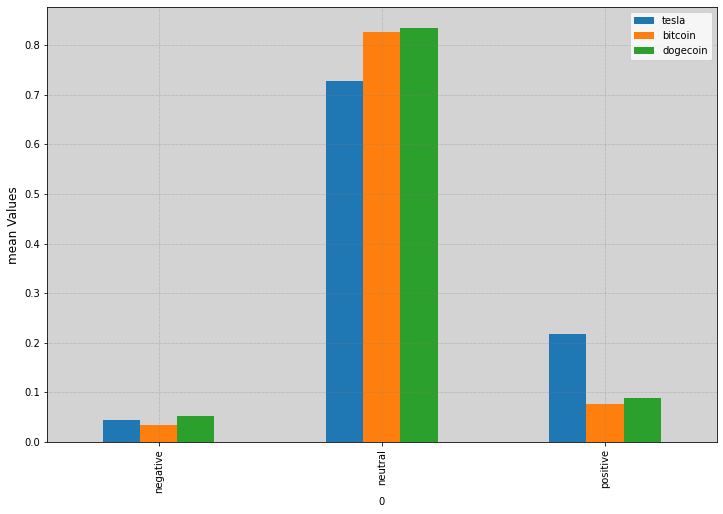

In [100]:
ax1=sent[['tesla','bitcoin','dogecoin']].plot(kind='bar',figsize=(12,8))
ax1.set_ylabel('mean Values',fontsize=12)
ax1.set_facecolor('lightgrey')
ax1.grid(color='grey', linestyle='dotted', linewidth=0.5)
#ax1.set_title('Sentiment analysis for Elon Musk tweets related to Tesla, Bitcoin, Dogecoin',fontsize=16)

### In the above figure we check the sentiment of tweets when he posts about tesla, bitcoin and dogecoin. The same outputs like the total tweets can be drawn.

In [101]:
df1t.head(2)

time  \
date                   
2021-04-10  11:32:35   
2021-04-10  04:07:04   

                                                                                      tweet  \
date                                                                                          
2021-04-10  @tesla_adri @wholemarsblog these things are best thought of as probabilities...   
2021-04-10  @austinteslaclub @owensparks_ @wholemarsblog good point.   next major softwa...   

            likes_count  replies_count  retweets_count photos  \
date                                                            
2021-04-10         2310            204             114     []   
2021-04-10         2487            210             138     []   

                                                                                   reply_to  \
date                                                                                          
2021-04-10  [{'screen_name': 'tesla_adri', 'name': 'Tesla_Adri', 'id': '1321117860844965...   
2021-04-10  [{'screen_name': 'AustinTeslaClub', 'name': 'Tesla Owners of Austin', 'id': ...   

            year  \
date               
2021-04-10  2021   
2021-04-10  2021   

                                                                                tweet_clean  \
date                                                                                          
2021-04-10  _adri  these things are best thought of as probabilities. there are 5 forwar...   
2021-04-10   _  good point.   next major software rev will do much better with automatin...   

            neg    neu    pos  
date                           
2021-04-10  0.0  0.865  0.135  
2021-04-10  0.0  0.823  0.177

In [102]:
#df1.reset_index()

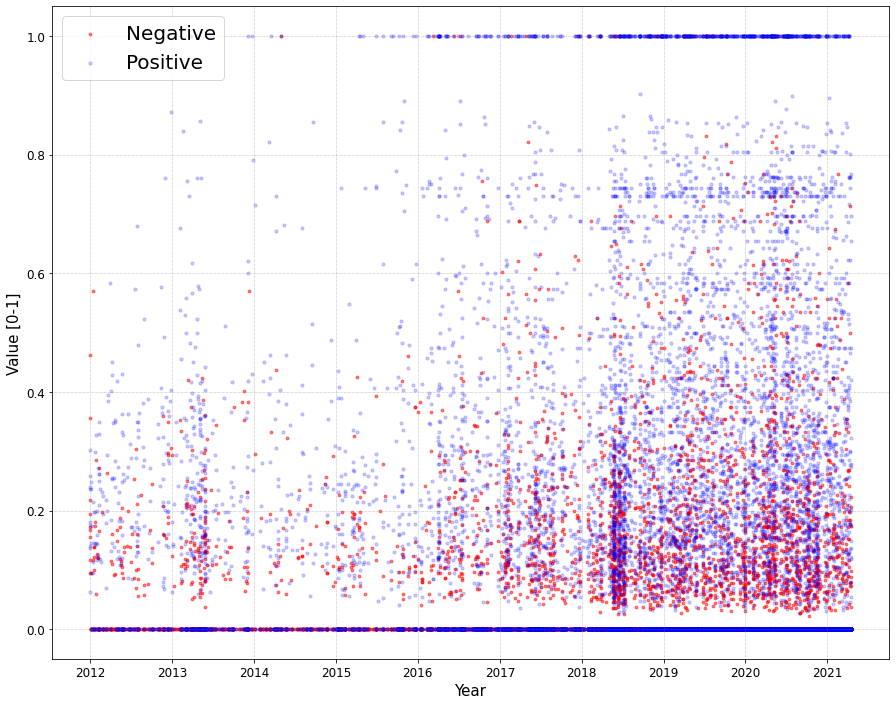

In [103]:
ax1=df1.reset_index()[(df1.index.year>2011)].plot(kind='scatter',x='date',y='neg',figsize=(15,12),s=8,color='red',ylabel='value [0-1]',alpha=0.5)
ax2=ax1
ax2=df1.reset_index()[(df1.index.year>2011)].plot(kind='scatter',x='date',y='pos',color='blue',s=10,ax=ax2,alpha=0.2)
#ax2.set_facecolor('lightgrey')
ax2.grid(color='grey', linestyle='dotted', linewidth=0.5)
ax2.set_ylabel('Value [0-1]',fontsize=15)
ax2.set_xlabel('Year',fontsize=15)
ax2.tick_params(axis='both',which='major',labelsize=12)
#ax2.set_title('Positive and Negative value of the tweets from Sentiment analysis',fontsize=16)
ax2.legend(['Negative','Positive'],loc='upper left',fontsize=20)

### As already mentioned above his tweets are more positive and it's also shown in the graph above for all tweets where the red dots (positive) are more and also have higher values. On the other hand blue dots (negative) are less and have lower values

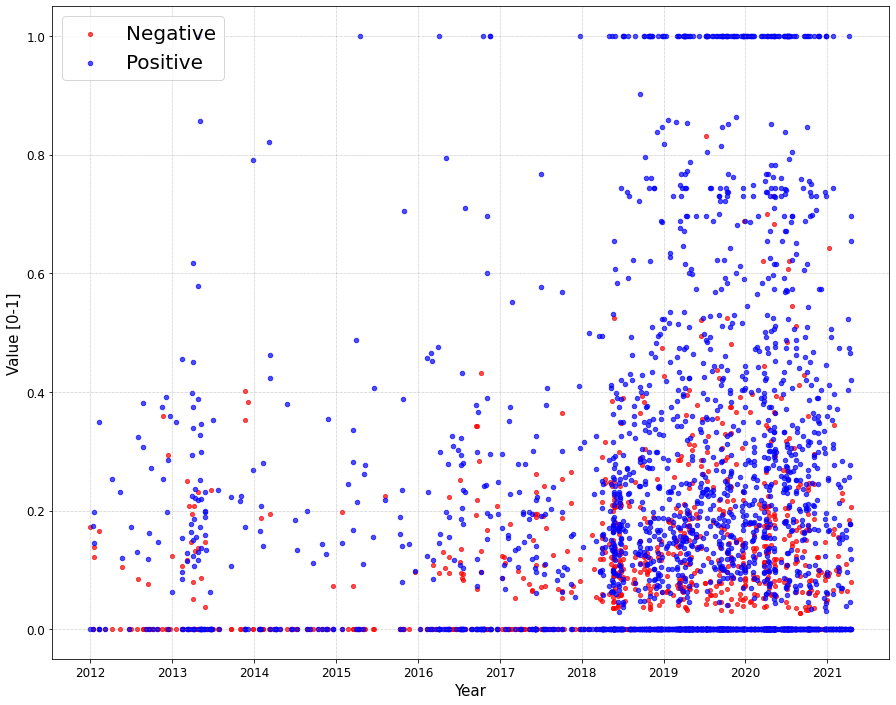

In [104]:
ax1=df1t.reset_index().plot(kind='scatter',x='date',y='neg',figsize=(15,12),s=17,color='red',ylabel='value [0-1]',alpha=0.7)
ax2=ax1
ax2=df1t.reset_index().plot(kind='scatter',x='date',y='pos',color='blue',s=20,ax=ax2,alpha=0.7)
#ax2.set_facecolor('lightgrey')
ax2.grid(color='grey', linestyle='dotted', linewidth=0.5)
ax2.set_ylabel('Value [0-1]',fontsize=15)
ax2.set_xlabel('Year',fontsize=15)
ax2.tick_params(axis='both',which='major',labelsize=12)
#ax2.set_title('Positive and Negative value of the tweets from Sentiment analysis for Tesla',fontsize=16)
ax2.legend(['Negative','Positive'],loc='upper left',fontsize=20)

### The above graph is for tesla related tweets where we can say the same outputs. More positive tweets.

## To get more insights, we plot the close price for Tesla, Bitcoin and Dogecoin in the same graph as a vertical line stating when Elon Musk tweet (showing as well the sentiment of the tweet) to get the first idea on the trend of the close price. This analysis is done only for tweet posts and not replys.

# TSLA

In [105]:
df1t['tweet_day']=1
df2=pd.concat([df1t,dft])

<ipython-input-105-1b2602a19f89>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [106]:
#dft.drop(columns='tweet',inplace=True)
df2.head(2)

time  \
2021-04-10  11:32:35   
2021-04-10  04:07:04   

                                                                                      tweet  \
2021-04-10  @tesla_adri @wholemarsblog these things are best thought of as probabilities...   
2021-04-10  @austinteslaclub @owensparks_ @wholemarsblog good point.   next major softwa...   

            likes_count  replies_count  retweets_count photos  \
2021-04-10       2310.0          204.0           114.0     []   
2021-04-10       2487.0          210.0           138.0     []   

                                                                                   reply_to  \
2021-04-10  [{'screen_name': 'tesla_adri', 'name': 'Tesla_Adri', 'id': '1321117860844965...   
2021-04-10  [{'screen_name': 'AustinTeslaClub', 'name': 'Tesla Owners of Austin', 'id': ...   

              year  \
2021-04-10  2021.0   
2021-04-10  2021.0   

                                                                                tweet_clean  \
2021-04-10  _adri  these things are best thought of as probabilities. there are 5 forwar...   
2021-04-10   _  good point.   next major software rev will do much better with automatin...   

            neg    neu    pos  tweet_day  Open  High  Low  Close  Adj Close  \
2021-04-10  0.0  0.865  0.135        1.0   NaN   NaN  NaN    NaN        NaN   
2021-04-10  0.0  0.823  0.177        1.0   NaN   NaN  NaN    NaN        NaN   

            Volume  
2021-04-10     NaN  
2021-04-10     NaN

In [107]:
#df2.index

In [108]:
#df2.sort_index(ascending=True,inplace=True)
#df2.head()

In [109]:
#df2['Close'].plot(figsize=(20,20))

In [110]:
#df2['tweet_day'].plot(figsize=(15,7))

In [111]:
#df2.head()

In [112]:
#only tweets and not replys
df2t=df1t[(df1t['reply_to']=='[]') & (df1t.index.year>2019) & (df1t.index.year<2021)&(df1t.index.month>8)]
df2t.shape

(19, 13)

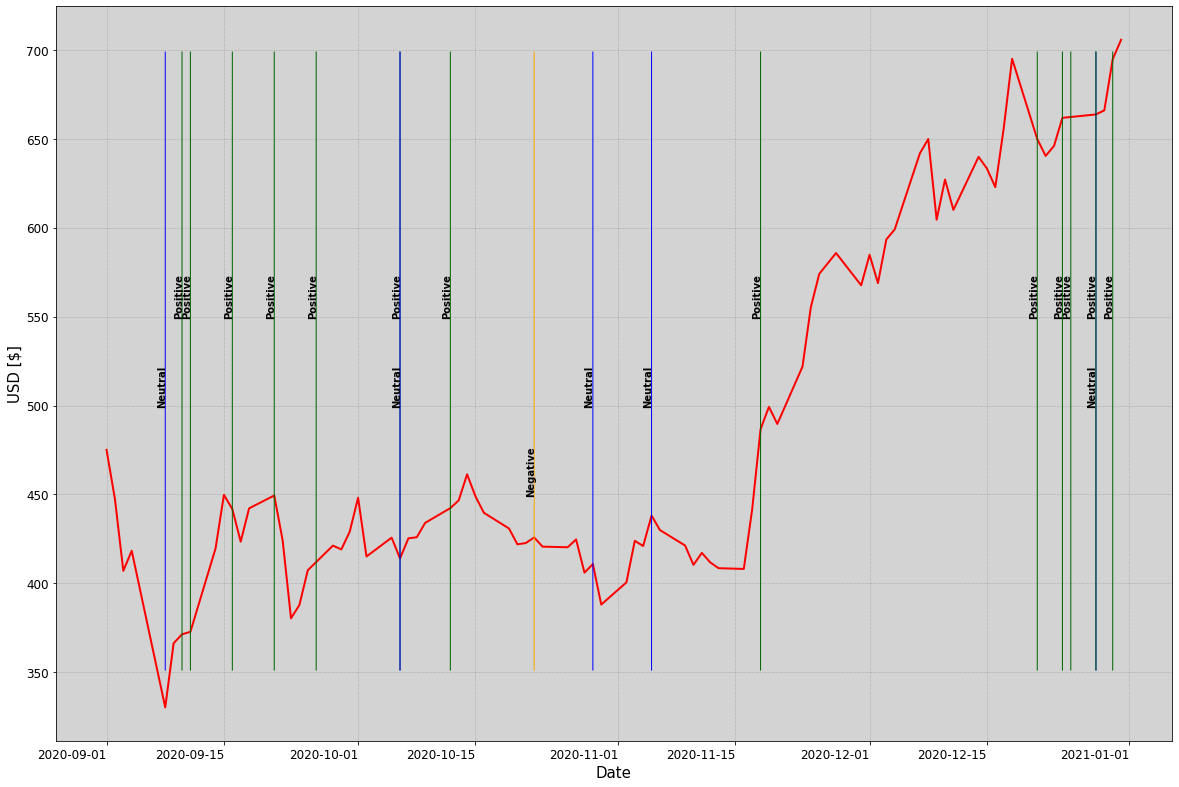

In [113]:
#x_lims = list(map(dt.datetime.fromtimestamp, [1546324311, 1641018711]))
#x_lims = mdates.date2num(x_lims)
#img = plt.imread("blacktesla.png")
ax=dft['Close'][(dft.index.year>2019) & (dft.index.year<2021) & (dft.index.month>8)].plot(figsize=(20,15),color='red',linewidth=2)
ax.grid(color='grey', linestyle='dotted', linewidth=0.5)
ax.set_facecolor('lightgrey')
#ax.set_title('Tesla Stock Daily Close Value',fontsize=18)
ax.set_ylabel('USD [$]',fontsize=15)
ax.set_xlabel('Date',fontsize=15)
ax.tick_params(axis='x',which='major',labelsize=12,labelrotation=0)
ax.tick_params(axis='y',which='major',labelsize=12)
#ax.imshow(img,aspect='auto',alpha=0.3,extent=[x_lims[0],x_lims[1],0,900])

i=0
for i in range (df2t.shape[0]):
    if df2t.iloc[i,11]>df2t.iloc[i,9]:
        y=df2t.index[i].year
        m=df2t.index[i].month
        d=df2t.index[i].day
        ax.annotate('',                      # s: str. Will leave it blank for no text
                     xy=(dt.datetime(y,m,d), 700),             # place head of the arrow at point (year 2012 , pop 70)
                     xytext=(dt.datetime(y,m,d), 350),         # place base of the arrow at point (year 2008 , pop 20)
                     xycoords='data',         # will use the coordinate system of the object being annotated 
                     arrowprops=dict(arrowstyle='-',connectionstyle='arc3', color='darkgreen')
                    )
        ax.text(dt.datetime(y,m,d-1),550,'Positive',rotation='vertical',fontweight='bold')
    elif df2t.iloc[i,11]<df2t.iloc[i,9]:
        y=df2t.index[i].year
        m=df2t.index[i].month
        d=df2t.index[i].day
        ax.annotate('',                      # s: str. Will leave it blank for no text
                     xy=(dt.datetime(y,m,d), 700),             # place head of the arrow at point (year 2012 , pop 70)
                     xytext=(dt.datetime(y,m,d), 350),         # place base of the arrow at point (year 2008 , pop 20)
                     xycoords='data',         # will use the coordinate system of the object being annotated 
                     arrowprops=dict(arrowstyle='-',connectionstyle='arc3', color='orange')
                    )
        ax.text(dt.datetime(y,m,d-1),450,'Negative',rotation='vertical',fontweight='bold')
    else:
        y=df2t.index[i].year
        m=df2t.index[i].month
        d=df2t.index[i].day
        ax.annotate('',                      # s: str. Will leave it blank for no text
                     xy=(dt.datetime(y,m,d), 700),             # place head of the arrow at point (year 2012 , pop 70)
                     xytext=(dt.datetime(y,m,d), 350),         # place base of the arrow at point (year 2008 , pop 20)
                     xycoords='data',         # will use the coordinate system of the object being annotated 
                     arrowprops=dict(arrowstyle='-',connectionstyle='arc3', color='blue')
                    )
        ax.text(dt.datetime(y,m,d-1),500,'Neutral',rotation='vertical',fontweight='bold')

In [114]:
#only tweets and not replys
df3t=df1t[(df1t['reply_to']=='[]') & (df1t.index.year>2020)]
df3t.shape

(9, 13)

In [115]:
#df3t

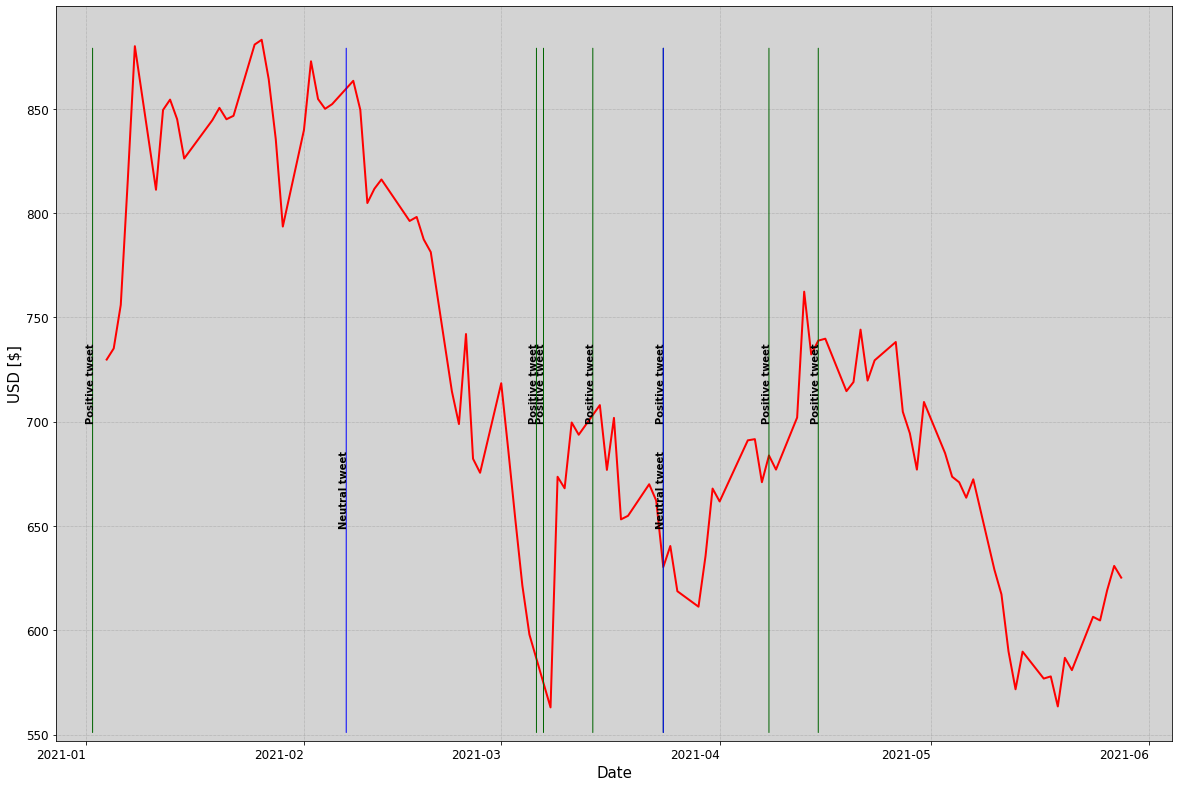

In [116]:
#x_lims = list(map(dt.datetime.fromtimestamp, [1546324311, 1641018711]))
#x_lims = mdates.date2num(x_lims)
#img = plt.imread("blacktesla.png")
ax=dft['Close'][(dft.index.year>2020) & (dft.index.month<6)].plot(figsize=(20,15),color='red',linewidth=2)
ax.grid(color='grey', linestyle='dotted', linewidth=0.5)
#ax.set_title('Tesla Stock Daily Close Value',fontsize=18)
ax.set_ylabel('USD [$]',fontsize=15)
ax.set_xlabel('Date',fontsize=15)
ax.set_facecolor('lightgrey')
ax.tick_params(axis='x',which='major',labelsize=12,labelrotation=0)
ax.tick_params(axis='y',which='major',labelsize=12)
#ax.imshow(img,aspect='auto',alpha=0.3,extent=[x_lims[0],x_lims[1],0,900])

i=0
for i in range (df3t.shape[0]):
    if df3t.iloc[i,11]>df3t.iloc[i,9]:
        y=df3t.index[i].year
        m=df3t.index[i].month
        d=df3t.index[i].day
        ax.annotate('',                      # s: str. Will leave it blank for no text
                     xy=(dt.datetime(y,m,d), 880),             # place head of the arrow at point (year 2012 , pop 70)
                     xytext=(dt.datetime(y,m,d), 550),         # place base of the arrow at point (year 2008 , pop 20)
                     xycoords='data',         # will use the coordinate system of the object being annotated 
                     arrowprops=dict(arrowstyle='-',connectionstyle='arc3', color='darkgreen')
                    )
        ax.text(dt.datetime(y,m,d-1),700,'Positive tweet',rotation='vertical',fontweight='bold')
    elif df3t.iloc[i,11]<df3t.iloc[i,9]:
        y=df3t.index[i].year
        m=df3t.index[i].month
        d=df3t.index[i].day
        ax.annotate('',                      # s: str. Will leave it blank for no text
                     xy=(dt.datetime(y,m,d), 880),             # place head of the arrow at point (year 2012 , pop 70)
                     xytext=(dt.datetime(y,m,d), 550),         # place base of the arrow at point (year 2008 , pop 20)
                     xycoords='data',         # will use the coordinate system of the object being annotated 
                     arrowprops=dict(arrowstyle='-',connectionstyle='arc3', color='orange')
                    )
        ax.text(dt.datetime(y,m,d-1),600,'Negative tweet',rotation='vertical',fontweight='bold')
    else:
        y=df3t.index[i].year
        m=df3t.index[i].month
        d=df3t.index[i].day
        ax.annotate('',                      # s: str. Will leave it blank for no text
                     xy=(dt.datetime(y,m,d), 880),             # place head of the arrow at point (year 2012 , pop 70)
                     xytext=(dt.datetime(y,m,d), 550),         # place base of the arrow at point (year 2008 , pop 20)
                     xycoords='data',         # will use the coordinate system of the object being annotated 
                     arrowprops=dict(arrowstyle='-',connectionstyle='arc3', color='blue')
                    )
        ax.text(dt.datetime(y,m,d-1),650,'Neutral tweet',rotation='vertical',fontweight='bold')

### In the above two graphs, from September 2020 until June 2021 we see the trend of the price everytime Elon Musk tweets about tesla. (green line for Positive, blue for Neutral and yellow for Negative tweets). We can see some rises and falls of the price but we will check it more accurately with calculations. We will calculate the ratio of the tesla stock closed price seven days after the tweet and compare it to the day of the tweet. We can also see that positve tweets are more than negatives from the above plots.

In [117]:
#Create a new column with five days added to the index
df1t['plus7']=pd.DatetimeIndex(df1t.index)+pd.DateOffset(7)
df1t['plus1']=pd.DatetimeIndex(df1t.index)+pd.DateOffset(1)
df1t['plus8']=pd.DatetimeIndex(df1t.index)+pd.DateOffset(8)
df1t['plus9']=pd.DatetimeIndex(df1t.index)+pd.DateOffset(9)
df1t['plus2']=pd.DatetimeIndex(df1t.index)+pd.DateOffset(2)
dft['plus7']=pd.DatetimeIndex(dft.index)+pd.DateOffset(7)

<ipython-input-117-3a4cca258ba7>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-117-3a4cca258ba7>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-117-3a4cca258ba7>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-117-3a4

In [118]:
df1t.head(2)

time  \
date                   
2021-04-10  11:32:35   
2021-04-10  04:07:04   

                                                                                      tweet  \
date                                                                                          
2021-04-10  @tesla_adri @wholemarsblog these things are best thought of as probabilities...   
2021-04-10  @austinteslaclub @owensparks_ @wholemarsblog good point.   next major softwa...   

            likes_count  replies_count  retweets_count photos  \
date                                                            
2021-04-10         2310            204             114     []   
2021-04-10         2487            210             138     []   

                                                                                   reply_to  \
date                                                                                          
2021-04-10  [{'screen_name': 'tesla_adri', 'name': 'Tesla_Adri', 'id': '1321117860844965...   
2021-04-10  [{'screen_name': 'AustinTeslaClub', 'name': 'Tesla Owners of Austin', 'id': ...   

            year  \
date               
2021-04-10  2021   
2021-04-10  2021   

                                                                                tweet_clean  \
date                                                                                          
2021-04-10  _adri  these things are best thought of as probabilities. there are 5 forwar...   
2021-04-10   _  good point.   next major software rev will do much better with automatin...   

            neg    neu    pos  tweet_day      plus7      plus1      plus8  \
date                                                                        
2021-04-10  0.0  0.865  0.135          1 2021-04-17 2021-04-11 2021-04-18   
2021-04-10  0.0  0.823  0.177          1 2021-04-17 2021-04-11 2021-04-18   

                plus9      plus2  
date                              
2021-04-10 2021-04-19 2021-04-12  
2021-04-10 2021-04-19 2021-04-12

In [119]:
i=0
ratio_pos=[]
i_pos=[]
ratio_neg=[]
i_neg=[]
ratio_neu=[]
for i in range (df1t.shape[0]):
    x=df1t.index[i].to_pydatetime().weekday()
    if x == 6:
        d=str(df1t.iloc[i,-4].day)
        y=str(df1t.iloc[i,-4].year)
        m=str(df1t.iloc[i,-4].month)
        d1=str(df1t.iloc[i,-3].day)
        y1=str(df1t.iloc[i,-3].year)
        m1=str(df1t.iloc[i,-3].month)
    elif x==5:
        d=str(df1t.iloc[i,-1].day)
        y=str(df1t.iloc[i,-1].year)
        m=str(df1t.iloc[i,-1].month)
        d1=str(df1t.iloc[i,-2].day)
        y1=str(df1t.iloc[i,-2].year)
        m1=str(df1t.iloc[i,-2].month)
    else:
        y=str(df1t.index[i].year)
        m=str(df1t.index[i].month)
        d=str(df1t.index[i].day)
        d1=str(df1t.iloc[i,-5].day)
        y1=str(df1t.iloc[i,-5].year)
        m1=str(df1t.iloc[i,-5].month)
    time1=y+'-'+m+'-'+d
    time5=y1+'-'+m1+'-'+d1
    if (time1 in dft.index) and (time5 in dft.index): 
        ratio=(dft.loc[time5,'Close']-dft.loc[time1,'Close'])/dft.loc[time1,'Close']
    if df1t.iloc[i,11]>df1t.iloc[i,9]:
        i_pos.append(dft.index[i])
        ratio_pos.append(ratio)
    elif df1t.iloc[i,11]<df1t.iloc[i,9]:
        ratio_neg.append(ratio)
    else: 
        ratio_neu.append(ratio)
    i+=1

In [120]:
dft.head(2)

Open   High    Low  Close  Adj Close    Volume      plus7
Date                                                                  
2010-06-29  3.800  5.000  3.508  4.778      4.778  93831500 2010-07-06
2010-06-30  5.158  6.084  4.660  4.766      4.766  85935500 2010-07-07

In [121]:
from collections import OrderedDict
ratio_pos=list(OrderedDict.fromkeys(ratio_pos))
len(ratio_pos)

555

In [122]:
ratio_neg=list(OrderedDict.fromkeys(ratio_neg))
len(ratio_neg)

222

In [123]:
ratio_neu=list(OrderedDict.fromkeys(ratio_neu))
len(ratio_neu)

410

In [124]:
ratio_pos[0:10]

[0.01802049255022918,
 0.0927003739121333,
 0.08050597976904321,
 0.01581649980435275,
 0.08810295528856042,
 0.1304781901724552,
 0.059752124970183285,
 -0.05359211499959858,
 0.2574422770870338,
 0.02274951887171725]

In [125]:
pos=np.average(ratio_pos)*100
pos

2.6150041258774954

In [126]:
neg=np.average(ratio_neg)*100
neg

2.3524071358918537

In [127]:
neu=np.average(ratio_neu)*100
neu

2.0962371404612314

In [128]:
pos2=pd.DataFrame(ratio_pos)
neg2=pd.DataFrame(ratio_neg)

In [129]:
pos2=pos2*100
neg2=neg2*100

In [130]:
pos2.head()

0
0  1.802049
1  9.270037
2  8.050598
3  1.581650
4  8.810296

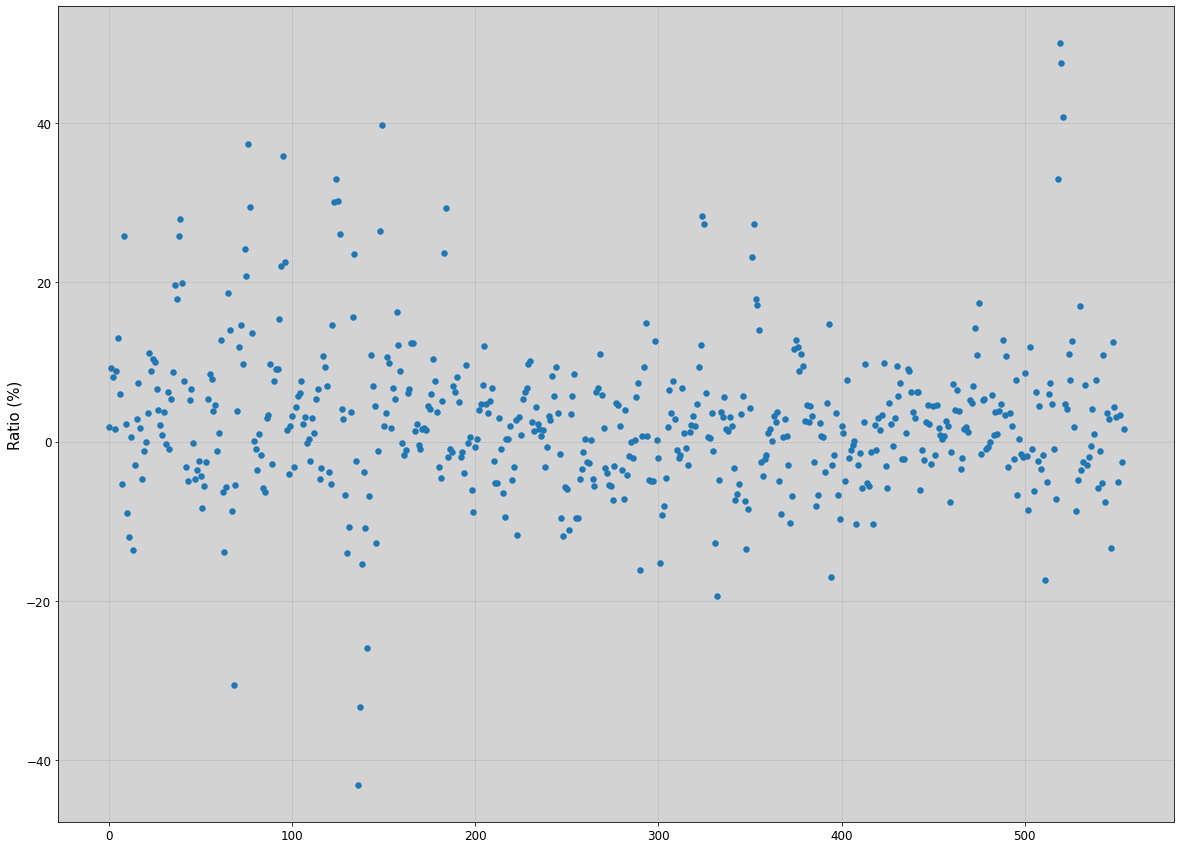

In [131]:
ax=pos2.reset_index().plot(kind='scatter',x=['index'],y=0,figsize=(20,15),linewidth=2)
ax.grid(color='grey', linestyle='dotted', linewidth=0.5)
#ax.set_title('Tesla Stock Close Price Week Ratio after positive tweet',fontsize=18)
ax.set_ylabel('Ratio (%)',fontsize=15)
ax.set_xlabel('',fontsize=15)
ax.tick_params(axis='x',which='major',labelsize=12,labelrotation=0)
ax.tick_params(axis='y',which='major',labelsize=12)
ax.set_facecolor('lightgrey')

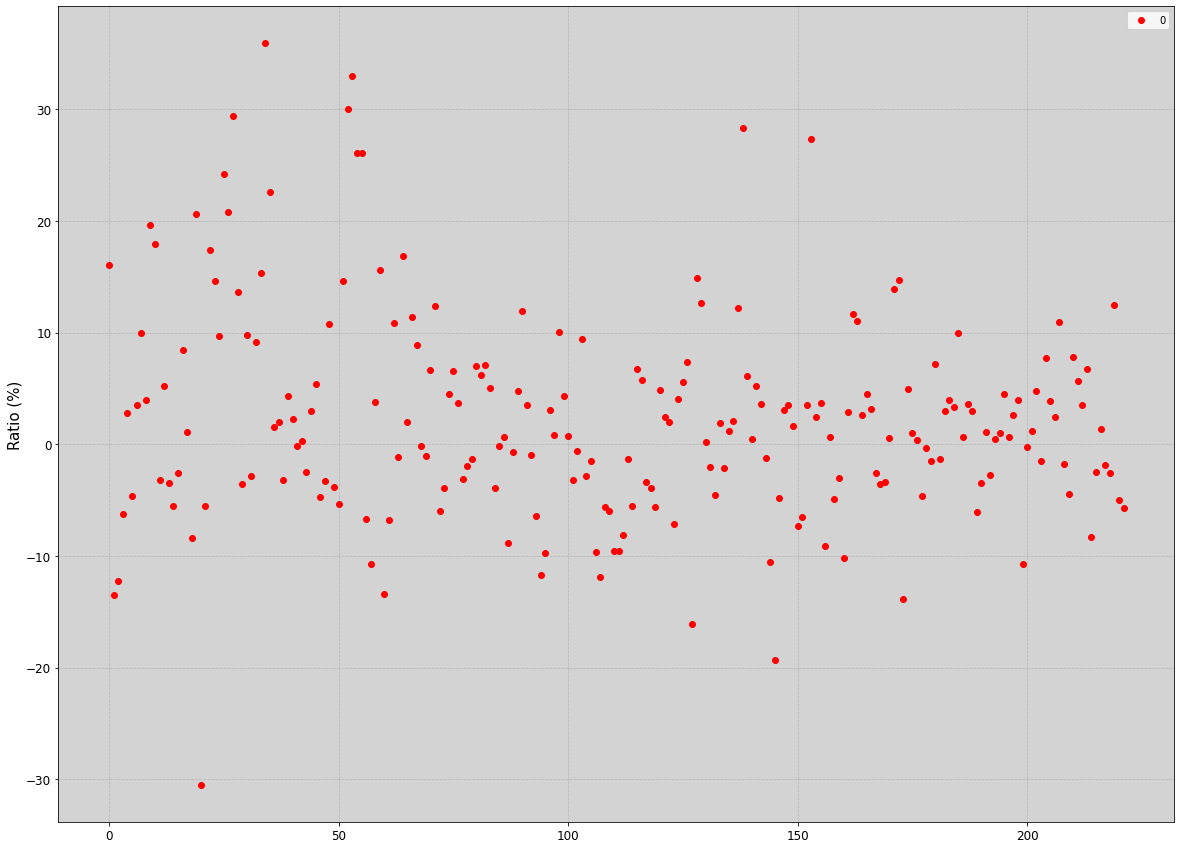

In [132]:
ax=neg2.plot(kind='line',figsize=(20,15),style='o-',linewidth=0,color='red')
ax.grid(color='grey', linestyle='dotted', linewidth=0.5)
#ax.set_title('Tesla Stock Close Price Week Ratio after negative tweet',fontsize=18)
ax.set_ylabel('Ratio (%)',fontsize=15)
ax.set_xlabel('',fontsize=15)
ax.tick_params(axis='x',which='major',labelsize=12,labelrotation=0)
ax.tick_params(axis='y',which='major',labelsize=12)
ax.set_facecolor('lightgrey')

## In the above two graphs we have the week ratio of the Tesla stock close price after every positive tweet (blue line) and after every negative tweet (red line). We see the ratio every time he positively tweets about tesla is slightly higher than when he negatively tweets. The maximum ratio after one positive tweet was around 50%. By saying ratio, we calculate: the difference between the close stock price a week after the tweet and the close stock price the day of the tweet divided  by the stock price the day of the tweet.

## Even though the ratio is higher for positive tweets is higher than for negative tweets, we will compare this ratio to normal. Normal means even if Elon Musk tweets or not.

In [133]:
dft.head(2)

Open   High    Low  Close  Adj Close    Volume      plus7
Date                                                                  
2010-06-29  3.800  5.000  3.508  4.778      4.778  93831500 2010-07-06
2010-06-30  5.158  6.084  4.660  4.766      4.766  85935500 2010-07-07

In [134]:
ratio=[]
i=0
for i in range (dft.shape[0]-7):
    ratio1=((dft.iloc[(i+7),3]-dft.iloc[i,3])/dft.iloc[i,3])
    ratio.append(ratio1)
    i+=1

In [135]:
len(ratio)

2834

In [136]:
norm=np.average(ratio)*100
norm

1.7485153741790467

In [137]:
total_ratios=pd.DataFrame(data=(norm,neu,neg,pos))

In [138]:
total_ratios.T

0         1         2         3
0  1.748515  2.096237  2.352407  2.615004

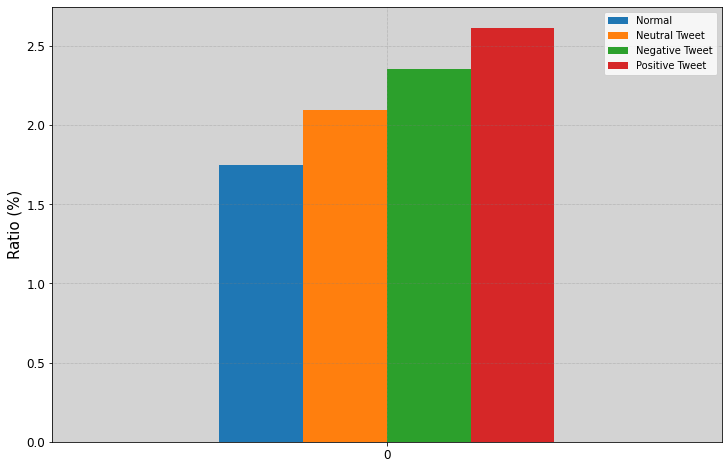

In [139]:
ax1=total_ratios.T[[0,1,2,3]].plot(kind='bar',figsize=(12,8))
ax1.set_ylabel('Ratio (%)',fontsize=15)
ax1.set_facecolor('lightgrey')
ax1.grid(color='grey', linestyle='dotted', linewidth=0.5)
#ax1.set_title('Increasing ratio of Tesla stock',fontsize=16)
ax1.legend(['Normal','Neutral Tweet','Negative Tweet','Positive Tweet'])
ax1.tick_params(axis='x',which='major',labelsize=12,labelrotation=0)
ax1.tick_params(axis='y',which='major',labelsize=12)

## From the above graph we can see that every time he tweets about tesla, it doesn't matter if the sentiment is positive, negative or neutral, the ratio is slightly higher than the normal ratio. The ratio of the tesla stock is always positive since the stock price is increasing over the years.

## Bitcoin

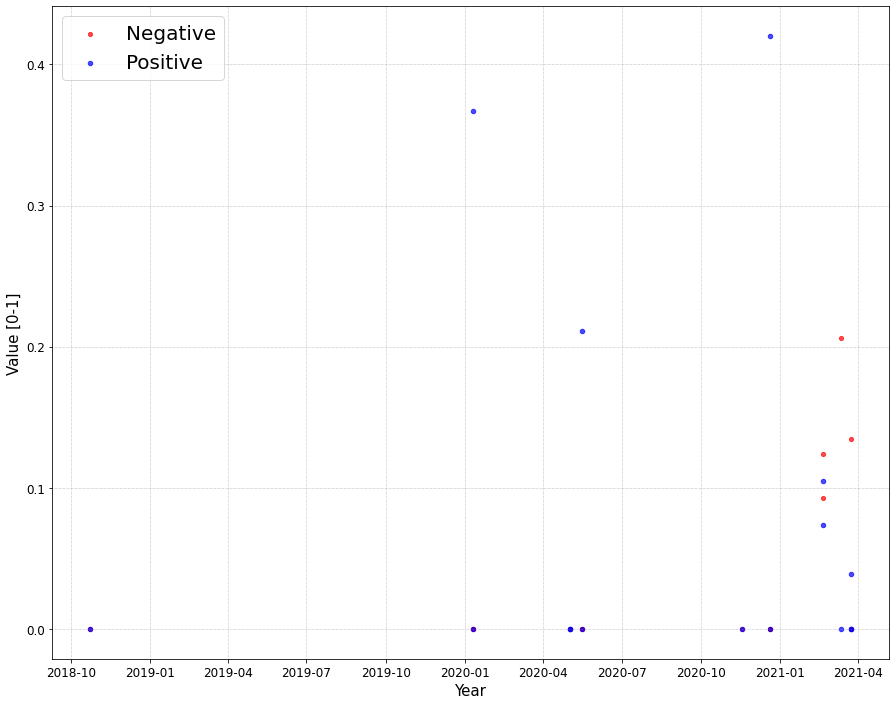

In [140]:
ax1=df1b.reset_index().plot(kind='scatter',x='date',y='neg',figsize=(15,12),s=17,color='red',ylabel='value [0-1]',alpha=0.7)
ax2=ax1
ax2=df1b.reset_index().plot(kind='scatter',x='date',y='pos',color='blue',s=20,ax=ax2,alpha=0.7)
#ax2.set_facecolor('lightgrey')
ax2.grid(color='grey', linestyle='dotted', linewidth=0.5)
ax2.set_ylabel('Value [0-1]',fontsize=15)
ax2.set_xlabel('Year',fontsize=15)
ax2.tick_params(axis='both',which='major',labelsize=12)
#ax2.set_title('Positive and Negative value of the tweets from Sentiment analysis for Bitcoin',fontsize=16)
ax2.legend(['Negative','Positive'],loc='upper left',fontsize=20)

In [184]:
#only tweets and not replys
df2b=df1b[(df1b['reply_to']=='[]') & (df1b.index.year>2019)]
df2b.shape

(7, 17)

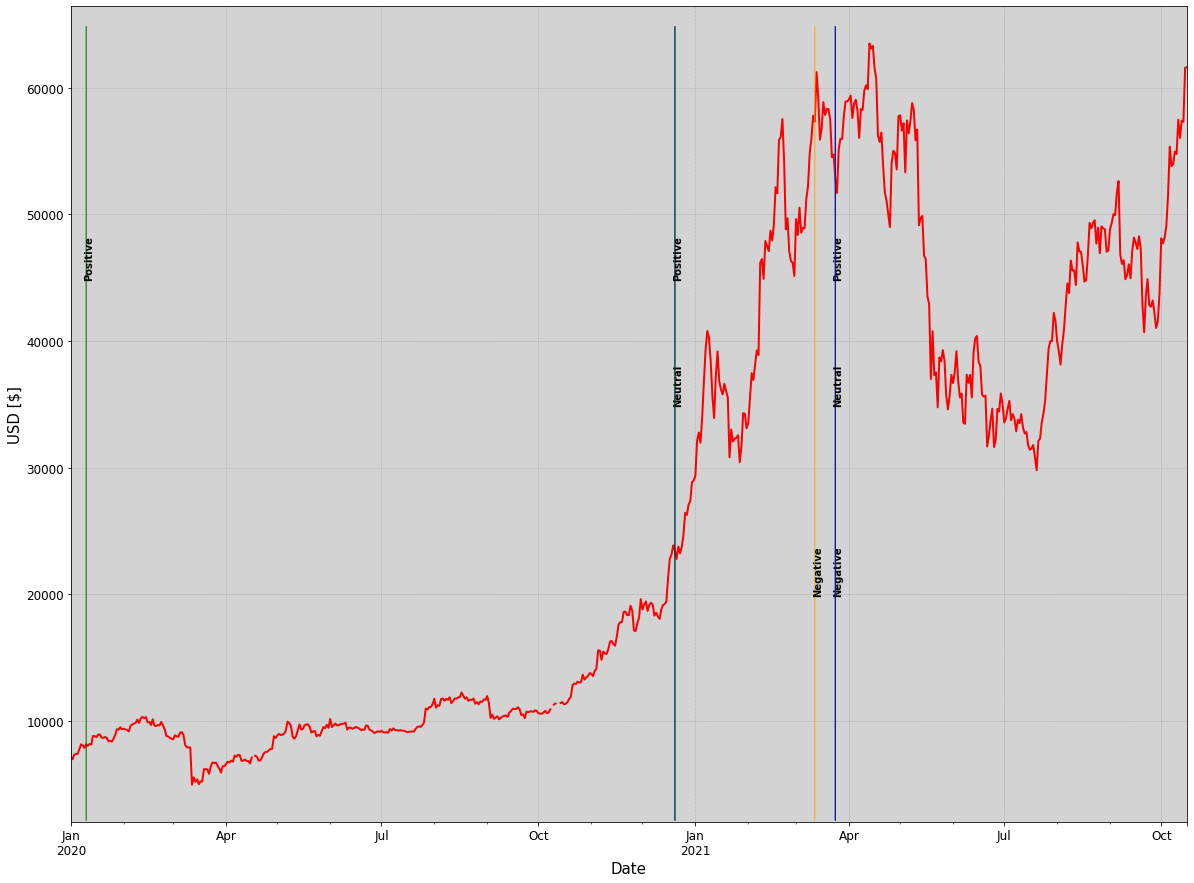

In [185]:
#x_lims = list(map(dt.datetime.fromtimestamp, [1546324311, 1641018711]))
#x_lims = mdates.date2num(x_lims)
#img = plt.imread("blacktesla.png")
ax=dfb['Close'][(dfb.index.year>2019)].plot(figsize=(20,15),color='red',linewidth=2)
ax.grid(color='grey', linestyle='dotted', linewidth=0.5)
ax.set_facecolor('lightgrey')
#ax.set_title('Tesla Stock Daily Close Value',fontsize=18)
ax.set_ylabel('USD [$]',fontsize=15)
ax.set_xlabel('Date',fontsize=15)
ax.tick_params(axis='x',which='major',labelsize=12,labelrotation=0)
ax.tick_params(axis='y',which='major',labelsize=12)
#ax.imshow(img,aspect='auto',alpha=0.3,extent=[x_lims[0],x_lims[1],0,900])

i=0
for i in range (df2b.shape[0]):
    if df2b.iloc[i,11]>df2b.iloc[i,9]:
        y=df2b.index[i].year
        m=df2b.index[i].month
        d=df2b.index[i].day
        ax.annotate('',                      # s: str. Will leave it blank for no text
                     xy=(dt.datetime(y,m,d), 65000),             # place head of the arrow at point (year 2012 , pop 70)
                     xytext=(dt.datetime(y,m,d), 2000),         # place base of the arrow at point (year 2008 , pop 20)
                     xycoords='data',         # will use the coordinate system of the object being annotated 
                     arrowprops=dict(arrowstyle='-',connectionstyle='arc3', color='darkgreen')
                    )
        ax.text(dt.datetime(y,m,d-1),45000,'Positive',rotation='vertical',fontweight='bold')
    elif df2b.iloc[i,11]<df2b.iloc[i,9]:
        y=df2b.index[i].year
        m=df2b.index[i].month
        d=df2b.index[i].day
        ax.annotate('',                      # s: str. Will leave it blank for no text
                     xy=(dt.datetime(y,m,d), 65000),             # place head of the arrow at point (year 2012 , pop 70)
                     xytext=(dt.datetime(y,m,d), 2000),         # place base of the arrow at point (year 2008 , pop 20)
                     xycoords='data',         # will use the coordinate system of the object being annotated 
                     arrowprops=dict(arrowstyle='-',connectionstyle='arc3', color='orange')
                    )
        ax.text(dt.datetime(y,m,d-1),20000,'Negative',rotation='vertical',fontweight='bold')
    else:
        y=df2b.index[i].year
        m=df2b.index[i].month
        d=df2b.index[i].day
        ax.annotate('',                      # s: str. Will leave it blank for no text
                     xy=(dt.datetime(y,m,d), 65000),             # place head of the arrow at point (year 2012 , pop 70)
                     xytext=(dt.datetime(y,m,d),2000),         # place base of the arrow at point (year 2008 , pop 20)
                     xycoords='data',         # will use the coordinate system of the object being annotated 
                     arrowprops=dict(arrowstyle='-',connectionstyle='arc3', color='blue')
                    )
        ax.text(dt.datetime(y,m,d-1),35000,'Neutral',rotation='vertical',fontweight='bold')

In [186]:
#Create a new column with five days added to the index
df1b['plus7']=pd.DatetimeIndex(df1b.index)+pd.DateOffset(7)
df1b['plus1']=pd.DatetimeIndex(df1b.index)+pd.DateOffset(1)
df1b['plus8']=pd.DatetimeIndex(df1b.index)+pd.DateOffset(8)
df1b['plus9']=pd.DatetimeIndex(df1b.index)+pd.DateOffset(9)
df1b['plus2']=pd.DatetimeIndex(df1b.index)+pd.DateOffset(2)
dfb['plus7']=pd.DatetimeIndex(dfb.index)+pd.DateOffset(7)

<ipython-input-186-a11afc924fe5>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-186-a11afc924fe5>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-186-a11afc924fe5>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-186-a11

In [187]:
df1b.head(2)

time  \
date                   
2021-03-24  09:10:43   
2021-03-24  09:09:34   

                                                                                      tweet  \
date                                                                                          
2021-03-24                   pay by bitcoin capability available outside us later this year   
2021-03-24  tesla is using only internal &amp; open source software &amp; operates bitco...   

            likes_count  replies_count  retweets_count photos reply_to  year  \
date                                                                           
2021-03-24       141418           3152            9279     []       []  2021   
2021-03-24       179638           4675           20572     []       []  2021   

                                                                                tweet_clean  \
date                                                                                          
2021-03-24                   pay by bitcoin capability available outside us later this year   
2021-03-24  tesla is using only internal &amp; open source software &amp; operates bitco...   

              neg    neu    pos      plus7      plus1      plus8      plus9  \
date                                                                          
2021-03-24  0.135  0.865  0.000 2021-03-31 2021-03-25 2021-04-01 2021-04-02   
2021-03-24  0.000  0.961  0.039 2021-03-31 2021-03-25 2021-04-01 2021-04-02   

                plus2  
date                   
2021-03-24 2021-03-26  
2021-03-24 2021-03-26

In [188]:
i=0
ratio_pos=[]
i_pos=[]
ratio_neg=[]
i_neg=[]
ratio_neu=[]
for i in range (df1b.shape[0]):
    x=df1b.index[i].to_pydatetime().weekday()
    if x == 6:
        d=str(df1b.iloc[i,-4].day)
        y=str(df1b.iloc[i,-4].year)
        m=str(df1b.iloc[i,-4].month)
        d1=str(df1b.iloc[i,-3].day)
        y1=str(df1b.iloc[i,-3].year)
        m1=str(df1b.iloc[i,-3].month)
    elif x==5:
        d=str(df1b.iloc[i,-1].day)
        y=str(df1b.iloc[i,-1].year)
        m=str(df1b.iloc[i,-1].month)
        d1=str(df1b.iloc[i,-2].day)
        y1=str(df1b.iloc[i,-2].year)
        m1=str(df1b.iloc[i,-2].month)
    else:
        y=str(df1b.index[i].year)
        m=str(df1b.index[i].month)
        d=str(df1b.index[i].day)
        d1=str(df1b.iloc[i,-5].day)
        y1=str(df1b.iloc[i,-5].year)
        m1=str(df1b.iloc[i,-5].month)
    time1=y+'-'+m+'-'+d
    time5=y1+'-'+m1+'-'+d1
    if (time1 in dfb.index) and (time5 in dfb.index): 
        ratio=(dfb.loc[time5,'Close']-dfb.loc[time1,'Close'])/dfb.loc[time1,'Close']
    if df1b.iloc[i,11]>df1b.iloc[i,9]:
        i_pos.append(dfb.index[i])
        ratio_pos.append(ratio)
    elif df1b.iloc[i,11]<df1b.iloc[i,9]:
        ratio_neg.append(ratio)
    else: 
        ratio_neu.append(ratio)
    i+=1

In [189]:
from collections import OrderedDict
ratio_pos=list(OrderedDict.fromkeys(ratio_pos))
len(ratio_pos)

4

In [190]:
ratio_neg=list(OrderedDict.fromkeys(ratio_neg))
len(ratio_neg)

3

In [191]:
ratio_neu=list(OrderedDict.fromkeys(ratio_neu))
len(ratio_neu)

7

In [192]:
pos=np.average(ratio_pos)*100
neg=np.average(ratio_neg)*100
neu=np.average(ratio_neu)*100
pos2=pd.DataFrame(ratio_pos)
neg2=pd.DataFrame(ratio_neg)
neu2=pd.DataFrame(ratio_neu)
pos2=pos2*100
neg2=neg2*100
neu2=neu2*100

In [193]:
neu2[1]=pos2[0]
neu2[2]=neg2[0]

In [194]:
neu2

0          1          2
0  11.643111  11.643111  11.643111
1  18.776964  18.776964   1.769624
2   8.285775  -8.426816 -17.084792
3  -8.426816   9.336666        NaN
4  -3.487832        NaN        NaN
5   9.336666        NaN        NaN
6  -2.184618        NaN        NaN

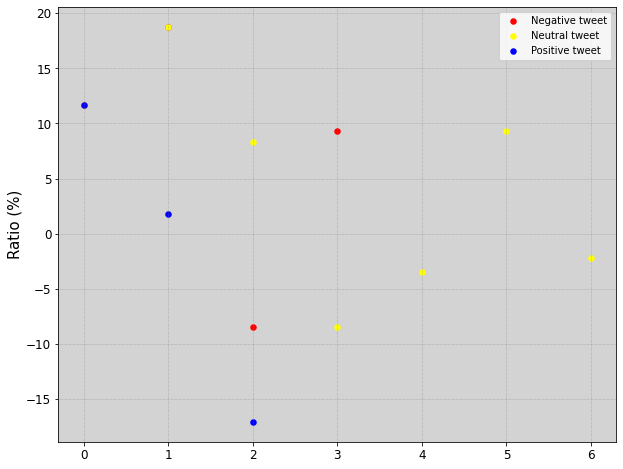

In [195]:
ax1=neu2.reset_index().plot(kind='scatter',x=['index'],y=1,figsize=(10,8),linewidth=2,color='red')
ax2=neu2.reset_index().plot(kind='scatter',x=['index'],y=0,figsize=(10,8),linewidth=2,color='yellow',ax=ax1)
ax=neu2.reset_index().plot(kind='scatter',x=['index'],y=2,figsize=(10,8),linewidth=2,ax=ax1,color='blue')
ax.grid(color='grey', linestyle='dotted', linewidth=0.5)
#ax.set_title('Bitcoin Stock Close Price Week Ratio after positive tweet',fontsize=18)
ax.set_ylabel('Ratio (%)',fontsize=15)
ax.set_xlabel('',fontsize=15)
ax.tick_params(axis='x',which='major',labelsize=12,labelrotation=0)
ax.tick_params(axis='y',which='major',labelsize=12)
ax.set_facecolor('lightgrey')
ax.legend(['Negative tweet','Neutral tweet','Positive tweet'])

In [196]:
ratio=[]
i=0
for i in range (dfb.shape[0]-7):
    ratio1=((dfb.iloc[(i+7),3]-dfb.iloc[i,3])/dfb.iloc[i,3])
    ratio.append(ratio1)
    i+=1

In [197]:
ratio = ratio[np.logical_not(np.isnan(x))]

<ipython-input-197-d83c2d5699b0>:1: DeprecationWarning:

In future, it will be an error for 'np.bool_' scalars to be interpreted as an index



In [198]:
norm=np.average(ratio)*100
total_ratios=pd.DataFrame(data=(norm,neu,neg,pos))

In [199]:
norm

-3.031287564643823

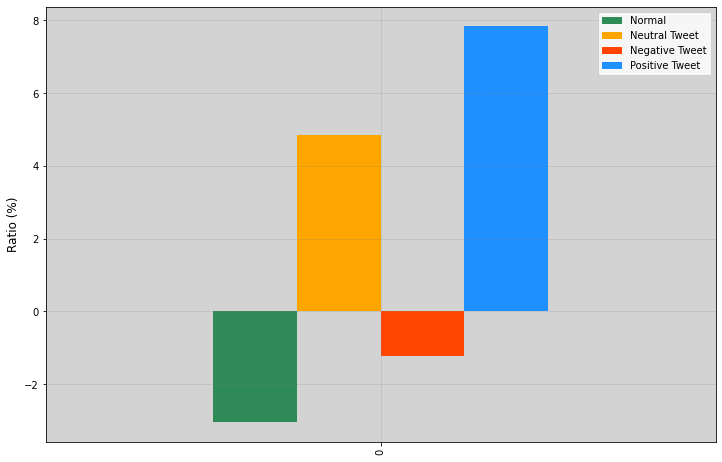

In [200]:
ax1=total_ratios.T[[0,1,2,3]].plot(kind='bar',figsize=(12,8),color=['seagreen','orange','orangered','dodgerblue'])
ax1.set_ylabel('Ratio (%)',fontsize=12)
ax1.set_facecolor('lightgrey')
ax1.grid(color='grey', linestyle='dotted', linewidth=0.5)
#ax1.set_title('Increasing ratio of Bitcoin stock',fontsize=16)
ax1.legend(['Normal','Neutral Tweet','Negative Tweet','Positive Tweet'])

# Dogecoin

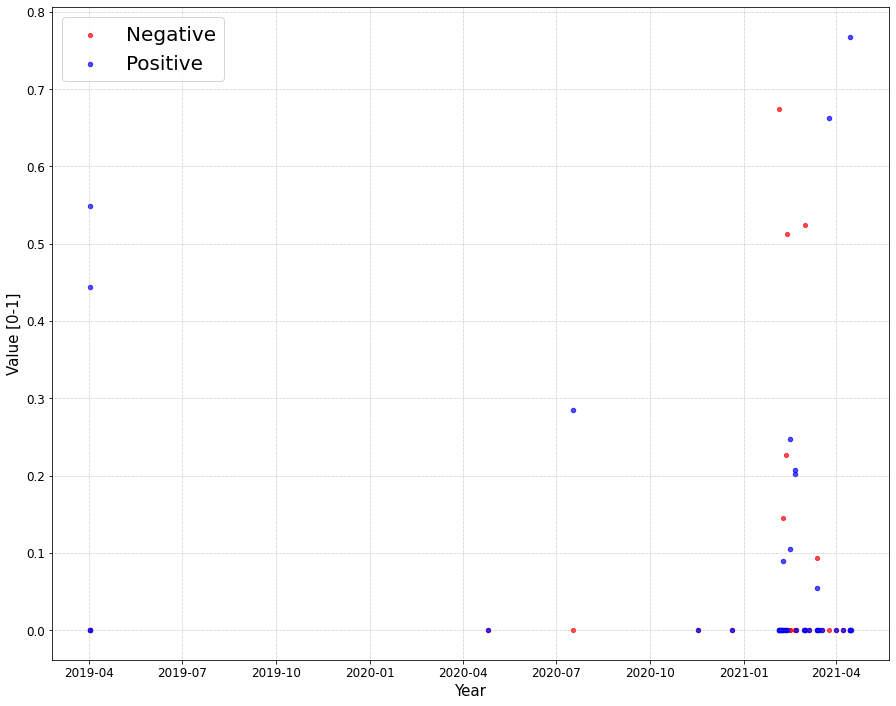

In [201]:
ax1=df1d.reset_index().plot(kind='scatter',x='date',y='neg',figsize=(15,12),s=17,color='red',ylabel='value [0-1]',alpha=0.7)
ax2=ax1
ax2=df1d.reset_index().plot(kind='scatter',x='date',y='pos',color='blue',s=20,ax=ax2,alpha=0.7)
#ax2.set_facecolor('lightgrey')
ax2.grid(color='grey', linestyle='dotted', linewidth=0.5)
ax2.set_ylabel('Value [0-1]',fontsize=15)
ax2.set_xlabel('Year',fontsize=15)
ax2.tick_params(axis='both',which='major',labelsize=12)
#ax2.set_title('Positive and Negative value of the tweets from Sentiment analysis for Bitcoin',fontsize=16)
ax2.legend(['Negative','Positive'],loc='upper left',fontsize=20)

In [202]:
#only tweets and not replys
df2d=df1d[(df1d.index.year>2020)]
df2d.shape

(33, 17)

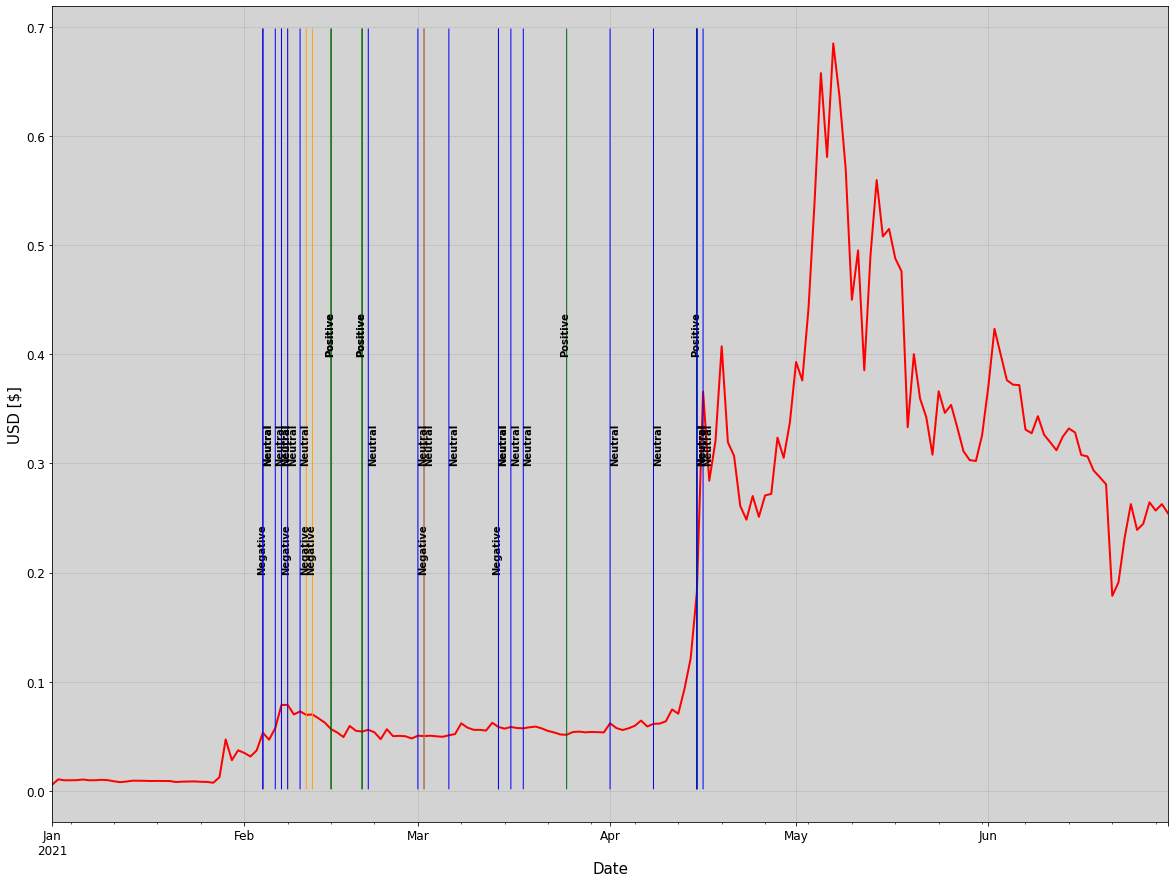

In [203]:
#x_lims = list(map(dt.datetime.fromtimestamp, [1546324311, 1641018711]))
#x_lims = mdates.date2num(x_lims)
#img = plt.imread("blacktesla.png")
ax=dfd['Close'][(dfd.index.year>2020)&(dfd.index.month<7)].plot(figsize=(20,15),color='red',linewidth=2)
ax.grid(color='grey', linestyle='dotted', linewidth=0.5)
ax.set_facecolor('lightgrey')
#ax.set_title('Tesla Stock Daily Close Value',fontsize=18)
ax.set_ylabel('USD [$]',fontsize=15)
ax.set_xlabel('Date',fontsize=15)
ax.tick_params(axis='x',which='major',labelsize=12,labelrotation=0)
ax.tick_params(axis='y',which='major',labelsize=12)
#ax.imshow(img,aspect='auto',alpha=0.3,extent=[x_lims[0],x_lims[1],0,900])

i=0
for i in range (df2d.shape[0]):
    if df2d.iloc[i,11]>df2d.iloc[i,9]:
        y=df2d.index[i].year
        m=df2d.index[i].month
        d=df2d.index[i].day
        ax.annotate('',                      # s: str. Will leave it blank for no text
                     xy=(dt.datetime(y,m,d), 0),             # place head of the arrow at point (year 2012 , pop 70)
                     xytext=(dt.datetime(y,m,d), 0.70),         # place base of the arrow at point (year 2008 , pop 20)
                     xycoords='data',         # will use the coordinate system of the object being annotated 
                     arrowprops=dict(arrowstyle='-',connectionstyle='arc3', color='darkgreen')
                    )
        ax.text(dt.datetime(y,m,d-1),0.4,'Positive',rotation='vertical',fontweight='bold')
    elif df2d.iloc[i,11]<df2d.iloc[i,9]:
        y=df2d.index[i].year
        m=df2d.index[i].month
        d=df2d.index[i].day
        ax.annotate('',                      # s: str. Will leave it blank for no text
                     xy=(dt.datetime(y,m,d), 0),             # place head of the arrow at point (year 2012 , pop 70)
                     xytext=(dt.datetime(y,m,d), 0.7),         # place base of the arrow at point (year 2008 , pop 20)
                     xycoords='data',         # will use the coordinate system of the object being annotated 
                     arrowprops=dict(arrowstyle='-',connectionstyle='arc3', color='orange')
                    )
        ax.text(dt.datetime(y,m,d-1),0.2,'Negative',rotation='vertical',fontweight='bold')
    else:
        y=df2d.index[i].year
        m=df2d.index[i].month
        d=df2d.index[i].day
        ax.annotate('',                      # s: str. Will leave it blank for no text
                     xy=(dt.datetime(y,m,d), 0),             # place head of the arrow at point (year 2012 , pop 70)
                     xytext=(dt.datetime(y,m,d),0.7),         # place base of the arrow at point (year 2008 , pop 20)
                     xycoords='data',         # will use the coordinate system of the object being annotated 
                     arrowprops=dict(arrowstyle='-',connectionstyle='arc3', color='blue')
                    )
        ax.text(dt.datetime(y,m,d),0.3,'Neutral',rotation='vertical',fontweight='bold')

In [204]:
#Create a new column with five days added to the index
df1d['plus7']=pd.DatetimeIndex(df1d.index)+pd.DateOffset(7)
df1d['plus1']=pd.DatetimeIndex(df1d.index)+pd.DateOffset(1)
df1d['plus8']=pd.DatetimeIndex(df1d.index)+pd.DateOffset(8)
df1d['plus9']=pd.DatetimeIndex(df1d.index)+pd.DateOffset(9)
df1d['plus2']=pd.DatetimeIndex(df1d.index)+pd.DateOffset(2)
dfd['plus7']=pd.DatetimeIndex(dfd.index)+pd.DateOffset(7)

<ipython-input-204-688d66f9b0a2>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-204-688d66f9b0a2>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-204-688d66f9b0a2>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-204-688

In [205]:
i=0
ratio_pos=[]
i_pos=[]
ratio_neg=[]
i_neg=[]
ratio_neu=[]
for i in range (df1d.shape[0]):
    x=df1d.index[i].to_pydatetime().weekday()
    if x == 6:
        d=str(df1d.iloc[i,-4].day)
        y=str(df1d.iloc[i,-4].year)
        m=str(df1d.iloc[i,-4].month)
        d1=str(df1d.iloc[i,-3].day)
        y1=str(df1d.iloc[i,-3].year)
        m1=str(df1d.iloc[i,-3].month)
    elif x==5:
        d=str(df1d.iloc[i,-1].day)
        y=str(df1d.iloc[i,-1].year)
        m=str(df1d.iloc[i,-1].month)
        d1=str(df1d.iloc[i,-2].day)
        y1=str(df1d.iloc[i,-2].year)
        m1=str(df1d.iloc[i,-2].month)
    else:
        y=str(df1d.index[i].year)
        m=str(df1d.index[i].month)
        d=str(df1d.index[i].day)
        d1=str(df1d.iloc[i,-5].day)
        y1=str(df1d.iloc[i,-5].year)
        m1=str(df1d.iloc[i,-5].month)
    time1=y+'-'+m+'-'+d
    time5=y1+'-'+m1+'-'+d1
    if (time1 in dfd.index) and (time5 in dfd.index): 
        ratio=(dfd.loc[time5,'Close']-dfd.loc[time1,'Close'])/dfd.loc[time1,'Close']
    if df1d.iloc[i,11]>df1d.iloc[i,9]:
        i_pos.append(dfd.index[i])
        ratio_pos.append(ratio)
    elif df1d.iloc[i,11]<df1d.iloc[i,9]:
        ratio_neg.append(ratio)
    else: 
        ratio_neu.append(ratio)
    i+=1

In [206]:
from collections import OrderedDict
ratio_pos=list(OrderedDict.fromkeys(ratio_pos))
len(ratio_pos)

6

In [207]:
ratio_neg=list(OrderedDict.fromkeys(ratio_neg))
len(ratio_neg)

6

In [208]:
ratio_neu=list(OrderedDict.fromkeys(ratio_neu))
len(ratio_neu)

18

In [209]:
pos=np.average(ratio_pos)*100
neg=np.average(ratio_neg)*100
neu=np.average(ratio_neu)*100
pos2=pd.DataFrame(ratio_pos)
neg2=pd.DataFrame(ratio_neg)
neu2=pd.DataFrame(ratio_neu)
pos2=pos2*100
neg2=neg2*100
neu2=neu2*100

In [210]:
neu2[1]=pos2[0]
neu2[2]=neg2[0]

In [211]:
neu2

0          1          2
0   196.445074  20.482818  -3.724075
1    -0.842126  -5.818520  15.391349
2   -10.342784  -5.064410 -21.307568
3    -8.618424  -2.655140 -14.545898
4    -3.724075   3.184258 -28.206787
5    -7.846777  43.225562  30.751187
6    15.391349        NaN        NaN
7    22.431273        NaN        NaN
8    -5.818520        NaN        NaN
9   -32.265145        NaN        NaN
10  -28.206787        NaN        NaN
11   30.751187        NaN        NaN
12   -4.073532        NaN        NaN
13   43.188011        NaN        NaN
14    5.350318        NaN        NaN
15    3.184258        NaN        NaN
16  -32.077241        NaN        NaN
17   43.225562        NaN        NaN

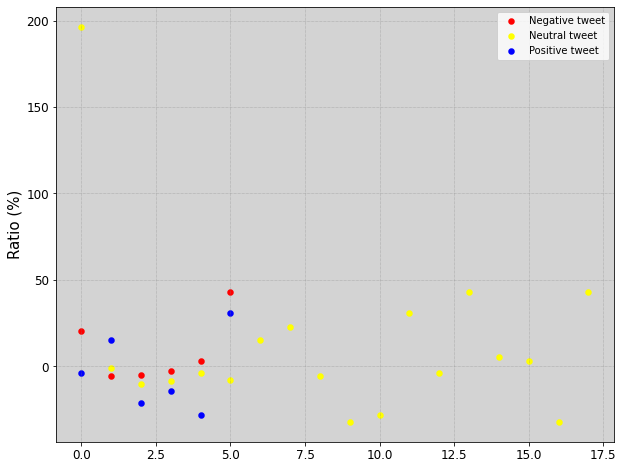

In [219]:
ax1=neu2.reset_index().plot(kind='scatter',x=['index'],y=1,figsize=(10,8),linewidth=2,color='red')
ax2=neu2.reset_index().plot(kind='scatter',x=['index'],y=0,figsize=(10,8),linewidth=2,color='yellow',ax=ax1)
ax=neu2.reset_index().plot(kind='scatter',x=['index'],y=2,figsize=(10,8),linewidth=2,ax=ax1,color='blue')
ax.grid(color='grey', linestyle='dotted', linewidth=0.5)
#ax.set_title('Bitcoin Stock Close Price Week Ratio after positive tweet',fontsize=18)
ax.set_ylabel('Ratio (%)',fontsize=15)
ax.set_xlabel('',fontsize=15)
ax.tick_params(axis='x',which='major',labelsize=12,labelrotation=0)
ax.tick_params(axis='y',which='major',labelsize=12)
ax.set_facecolor('lightgrey')
ax.legend(['Negative tweet','Neutral tweet','Positive tweet'])

In [213]:
df1d[df1d['reply_to']=='[]']

time  \
date                   
2021-04-01  13:25:23   
2021-03-14  01:51:05   
2021-03-14  01:46:16   
2021-03-14  01:40:41   
2021-03-06  06:40:30   
2021-03-01  21:57:08   
2021-02-21  23:27:06   
2021-02-15  01:25:16   
2021-02-11  11:08:33   
2021-02-10  17:08:11   
2021-02-08  00:25:14   
2021-02-04  10:27:10   
2021-02-04  10:15:26   
2021-02-04  09:35:35   
2020-12-20  11:30:04   
2019-04-02  23:38:38   
2019-04-02  23:16:58   
2019-04-02  12:24:39   
2021-04-15  07:33:18   

                                                                                      tweet  \
date                                                                                          
2021-04-01                    spacex is going to put a literal dogecoin on the literal moon   
2021-03-14                                               why are you so dogematic, they ask   
2021-03-14  origin of doge day afternoon: the ancient romans sacrificed a dogecoin at th...   
2021-03-14                                                               doge day afternoon   
2021-03-06                                                   doge spelled backwards is egod   
2021-03-01                       doge meme shield (legendary item)  https://t.co/ceomu9q84c   
2021-02-21                                                                      dojo 4 doge   
2021-02-15  if major dogecoin holders sell most of their coins, it will get my full supp...   
2021-02-11  frodo was the underdoge, all thought he would fail, himself most of all.  ht...   
2021-02-10                    bought some dogecoin for lil x, so he can be a toddler hodler   
2021-02-08                                                         🎶 who let the doge out 🎶   
2021-02-04                                                     no highs, no lows, only doge   
2021-02-04                                                  dogecoin is the people’s crypto   
2021-02-04                                                                             doge   
2020-12-20                                                                   one word: doge   
2019-04-02                                 dogecoin value may vary  https://t.co/uwerahpv63   
2019-04-02                                           dogecoin rulz  https://t.co/flwwugaglu   
2019-04-02            @tom_heats dogecoin might be my fav cryptocurrency. it’s pretty cool.   
2021-04-15                                doge barking at the moon  https://t.co/qfb81d7zol   

            likes_count  replies_count  retweets_count  \
date                                                     
2021-04-01       535373          25947           50139   
2021-03-14       247187           9666           19545   
2021-03-14        76253           2482            7826   
2021-03-14       176062           7411           18877   
2021-03-06       409756          20999           38440   
2021-03-01       283691           9506           26638   
2021-02-21       328590          19992           33212   
2021-02-15       332146          29046           35001   
2021-02-11       248030          19831           30389   
2021-02-10       551419          29116           59638   
2021-02-08       791454          27495          115707   
2021-02-04       777805          22644          114920   
2021-02-04       555730          19461          104278   
2021-02-04       262590           9416           46468   
2020-12-20       223227          11160           26306   
2019-04-02        20121           1078            1953   
2019-04-02       138739           1725           16471   
2019-04-02         9028            558            2414   
2021-04-15       310149          20460           47045   

                                                         photos reply_to  \
date                                                                       
2021-04-01                                                   []       []   
2021-03-14                                                   []     

In [214]:
ratio=[]
i=0
for i in range (dfd.shape[0]-7):
    ratio1=((dfd.iloc[(i+7),3]-dfd.iloc[i,3])/dfd.iloc[i,3])
    ratio.append(ratio1)
    i+=1

In [215]:
len(ratio)

2587

In [216]:
ratio = ratio[np.logical_not(np.isnan(x))]

<ipython-input-216-d83c2d5699b0>:1: DeprecationWarning:

In future, it will be an error for 'np.bool_' scalars to be interpreted as an index



In [217]:
norm=np.average(ratio)*100
total_ratios=pd.DataFrame(data=(norm,neu,neg,pos))

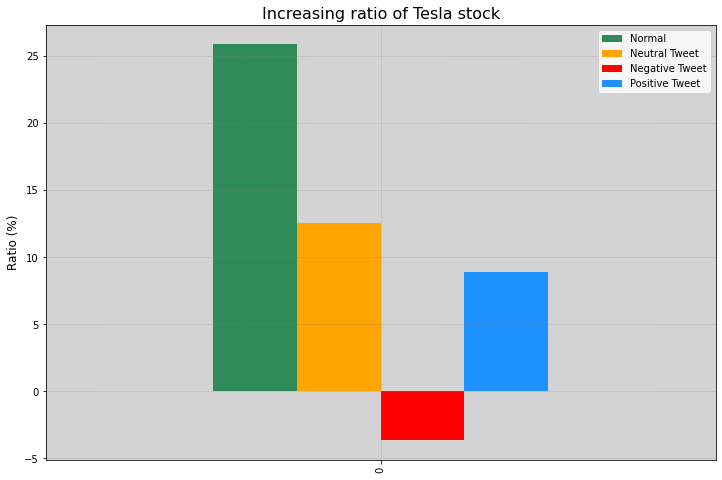

In [218]:
ax1=total_ratios.T[[0,1,2,3]].plot(kind='bar',figsize=(12,8),color=['seagreen','orange','red','dodgerblue'])
ax1.set_ylabel('Ratio (%)',fontsize=12)
ax1.set_facecolor('lightgrey')
ax1.grid(color='grey', linestyle='dotted', linewidth=0.5)
ax1.set_title('Increasing ratio of Tesla stock',fontsize=16)
ax1.legend(['Normal','Neutral Tweet','Negative Tweet','Positive Tweet'])

# 3. Limitations

#### Regarding the limitations, further time series analysis can be done before proceeding to further analysis of the stock price correlation with the tweets. This is because, it is observed that the price is increasing more when Elon Musk tweets, this might be random and affected by other factors. This can be checked in further analysis. In addition, other factors like anouncing of new car model or new factories to influence more the price of the stock.

# 4. References:
###  [A] Elon Musk’s Twitter and Its Correlation with Tesla’s Stock Market - Daniel Pyeong Kang Kim, Jongwhee Lee, Jeanne Suh
###  [B] Detecting the sentiment on Elon Musk’s tweets with Python - Juan Cruz Martinez
###  [C] EPL448: Data Mining on the Web – Lab 11 - Pavlos Antoniou
###  [D] Data from Kaggle